<h1>SC1015 Mini Project: Group 8<h1>

<h3>Import Libraries</h3>

In [38]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set()

<h3>Import Dataset</h3>

In [39]:
# Read in dataset
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


<h3>Preliminary Exploration</h3>

In [40]:
# shape of dataset
print('Data type: ', type(df))
print('Data dims: ', df.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1025, 14)


In [41]:
# data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


By performing some quick observations on the dataset, we were able to deduce the following:
* There are `14` features and `1025` observations in the dataset.
* The response variable seems to be `target`, while the remaining 13 features are most likely predictors.
* There is only `1` feature identified as `float64` by default, while the rest are `int64`. They all appear to be `Numeric` variables.
* At first glance, no features contain null or N/A observations. However, more data exploration will have to be performed to confirm this.

The description of the dataset, as provided by the UCI Machine Learning Repository and Kaggle, is as follows:
https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

> 1. `age`: age in years
> 2. `sex`: sex
    * 0: female
    * 1: male
> 3. `cp`: chest pain type
    * 0: asymptomatic
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
> 4. `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
> 5. `chol`: serum cholestoral in mg/dl
> 6. `fbs`: (fasting blood sugar > 120 mg/dl)
    * 1: true
    * 0: false
> 7. `restecg`: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
> 8. `thalach`: maximum heart rate achieved
> 9. `exang`: exercise induced angina
    * 1: yes
    * 0: no
> 10. `oldpeak`: ST depression induced by exercise relative to rest
> 11. `slope`: the slope of the peak exercise ST segment
    * 0: downsloping
    * 1: flat
    * 2: upsloping
> 12. `ca`: number of major vessels (0-3) colored by flourosopy
> 13. `thal`: the presence of a blood disorder thalassemia 
    * 1: fixed defect (no blood flow in some parts of the heart)
    * 2: normal blood flow
    * 3: reversable defect (blood flow observed but it is not normal)
> 14. `target`: diagnosis of heart disease (angiographic disease status)
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing

From this description and our observations on the dataset, we can then deduce the following about the features:
* The predictors `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` and the response variable `target` are <b>nominal categorical variables</b>, where categories are represented by numeric indicators. They will be treated as if they were categorical variables.
* The predictors `age`, `trestbps`, `chol`, `thalach` and `oldpeak` are <b>continuous numeric variables</b>, measured over a range of values.

In [42]:
# separate continuous from categorical into two lists
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [43]:
df[cont].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [77]:
pd.DataFrame(df[cat].astype('object').describe())

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,1025,1025,1025,1025,1025,1025,1025,1018
unique,2,4,2,3,2,3,5,3
top,1,0,0,1,0,1,0,2
freq,713,497,872,513,680,482,578,544


In [78]:
pd.DataFrame(df['target'].astype('object').describe())

,target
count,1025
unique,2
top,1
freq,526


<u>Are there any outliers in the data?</u>

We will use the <b>1.5IQR</b> rule to designate outliers as data points that lie beyond <b>Q3 + (1.5 * IQR)</b> [1.5IQR above 75th percentile] and below <b>Q1 + (1.5 * IQR)</b> [1.5IQR below 25th percentile] for the continuous variables.

We notice that there are outliers in our data. For example, the max values for `trestbps`, `chol`, and `oldpeak` lie beyond the Q3 + (1.5 * IQR) range, and the min value for `thalach` is well below the Q1 + (1.5 * IQR) range. 

However, these outliers can be construed to be abnormal values that are indicators of heart disease. For example, a cholesterol level above 240 mg/dL is in the unhealthy range, and the max value for `chol`, which is 564 mg/dL, isn't exactly unheard of. And in fact, the lowest heart rate recorded was 27 bpm, so the min value for `thalach`, which is 71 bpm, appears to be a valid observation. Therefore, we will keep these outliers by default as they are completely valid observations from a medical perspective.

<h2>Exploratory Data Analysis</h2>

For our exploratory data analysis, we will create a temporary dataframe with more intuitive labels for the categorical variables to help facilitate our analyses.

In [45]:
# use a dictionary to map numeric values to actual definition, for each categorical variable
dict1 = {'sex': {0: 'Female', 1: 'Male'}, 
        'cp': {0: 'Asymptomatic', 1: 'Typical', 2: 'Atypical', 3: 'Non-Anginal'}, 
        'fbs': {0: 'False', 1: 'True'}, 
        'restecg': {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Probable/Definite LVH'},
        'exang': {0: 'No', 1: 'Yes'},
        'slope': {2: 'Upsloping', 1: 'Flat', 0: 'Downsloping'}, 
        'ca': {0: 0, 1: 1, 2: 2, 3: 3},
        'thal': {1: 'Normal', 2: 'Fixed', 3: 'Reversible'},
        'target': {0: 'No', 1: 'Yes'}}

# create temporary dataframe for EDA
df_new = df.copy()
for i in dict1:
    df_new = df_new.replace({i: dict1[i]})

In [46]:
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Asymptomatic,125,212,False,ST-T Wave Abnormality,168,No,1.0,Upsloping,2,Reversible,No
1,53,Male,Asymptomatic,140,203,True,Normal,155,Yes,3.1,Downsloping,0,Reversible,No
2,70,Male,Asymptomatic,145,174,False,ST-T Wave Abnormality,125,Yes,2.6,Downsloping,0,Reversible,No
3,61,Male,Asymptomatic,148,203,False,ST-T Wave Abnormality,161,No,0.0,Upsloping,1,Reversible,No
4,62,Female,Asymptomatic,138,294,True,ST-T Wave Abnormality,106,No,1.9,Flat,3,Fixed,No


We will also use the `cont` and `cat` lists created before to analyze our continuous and categorical variables separately.

<h3>Univariate Analysis</h3>

<h4>Target Variable</h4>

Univariate analysis on the response variable `target`.

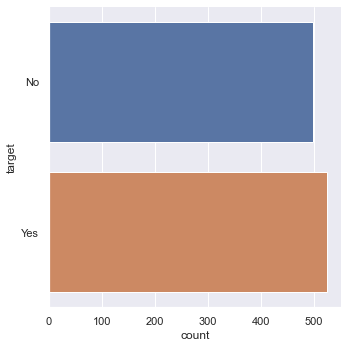

In [47]:
sb.catplot(data = df_new, y='target', kind='count')

In [48]:
countHD, countNHD = df_new['target'].value_counts()
print('% with Heart Disease: {:.0%}'.format(countHD/(countHD+countNHD)))
print('% without Heart Disease: {:.0%}'.format(countNHD/(countHD+countNHD)))

% with Heart Disease: 51%
% without Heart Disease: 49%


<u>Is there a need to resample the data to balance the classes such that predictive modelling is less biased towards a particular class?</u>

Data resampling is performed to resolve an imbalance of classes in the response variable, which can cause bias in the predicted results. For our response variable `target`, the classes of "Yes" and "No" to indicate heart disease are actually extremely well-balanced, with virtually no difference in the number of samples between both classes at all. Therefore, there is no need to resample the data.

<h4>Continuous Variables</h4>

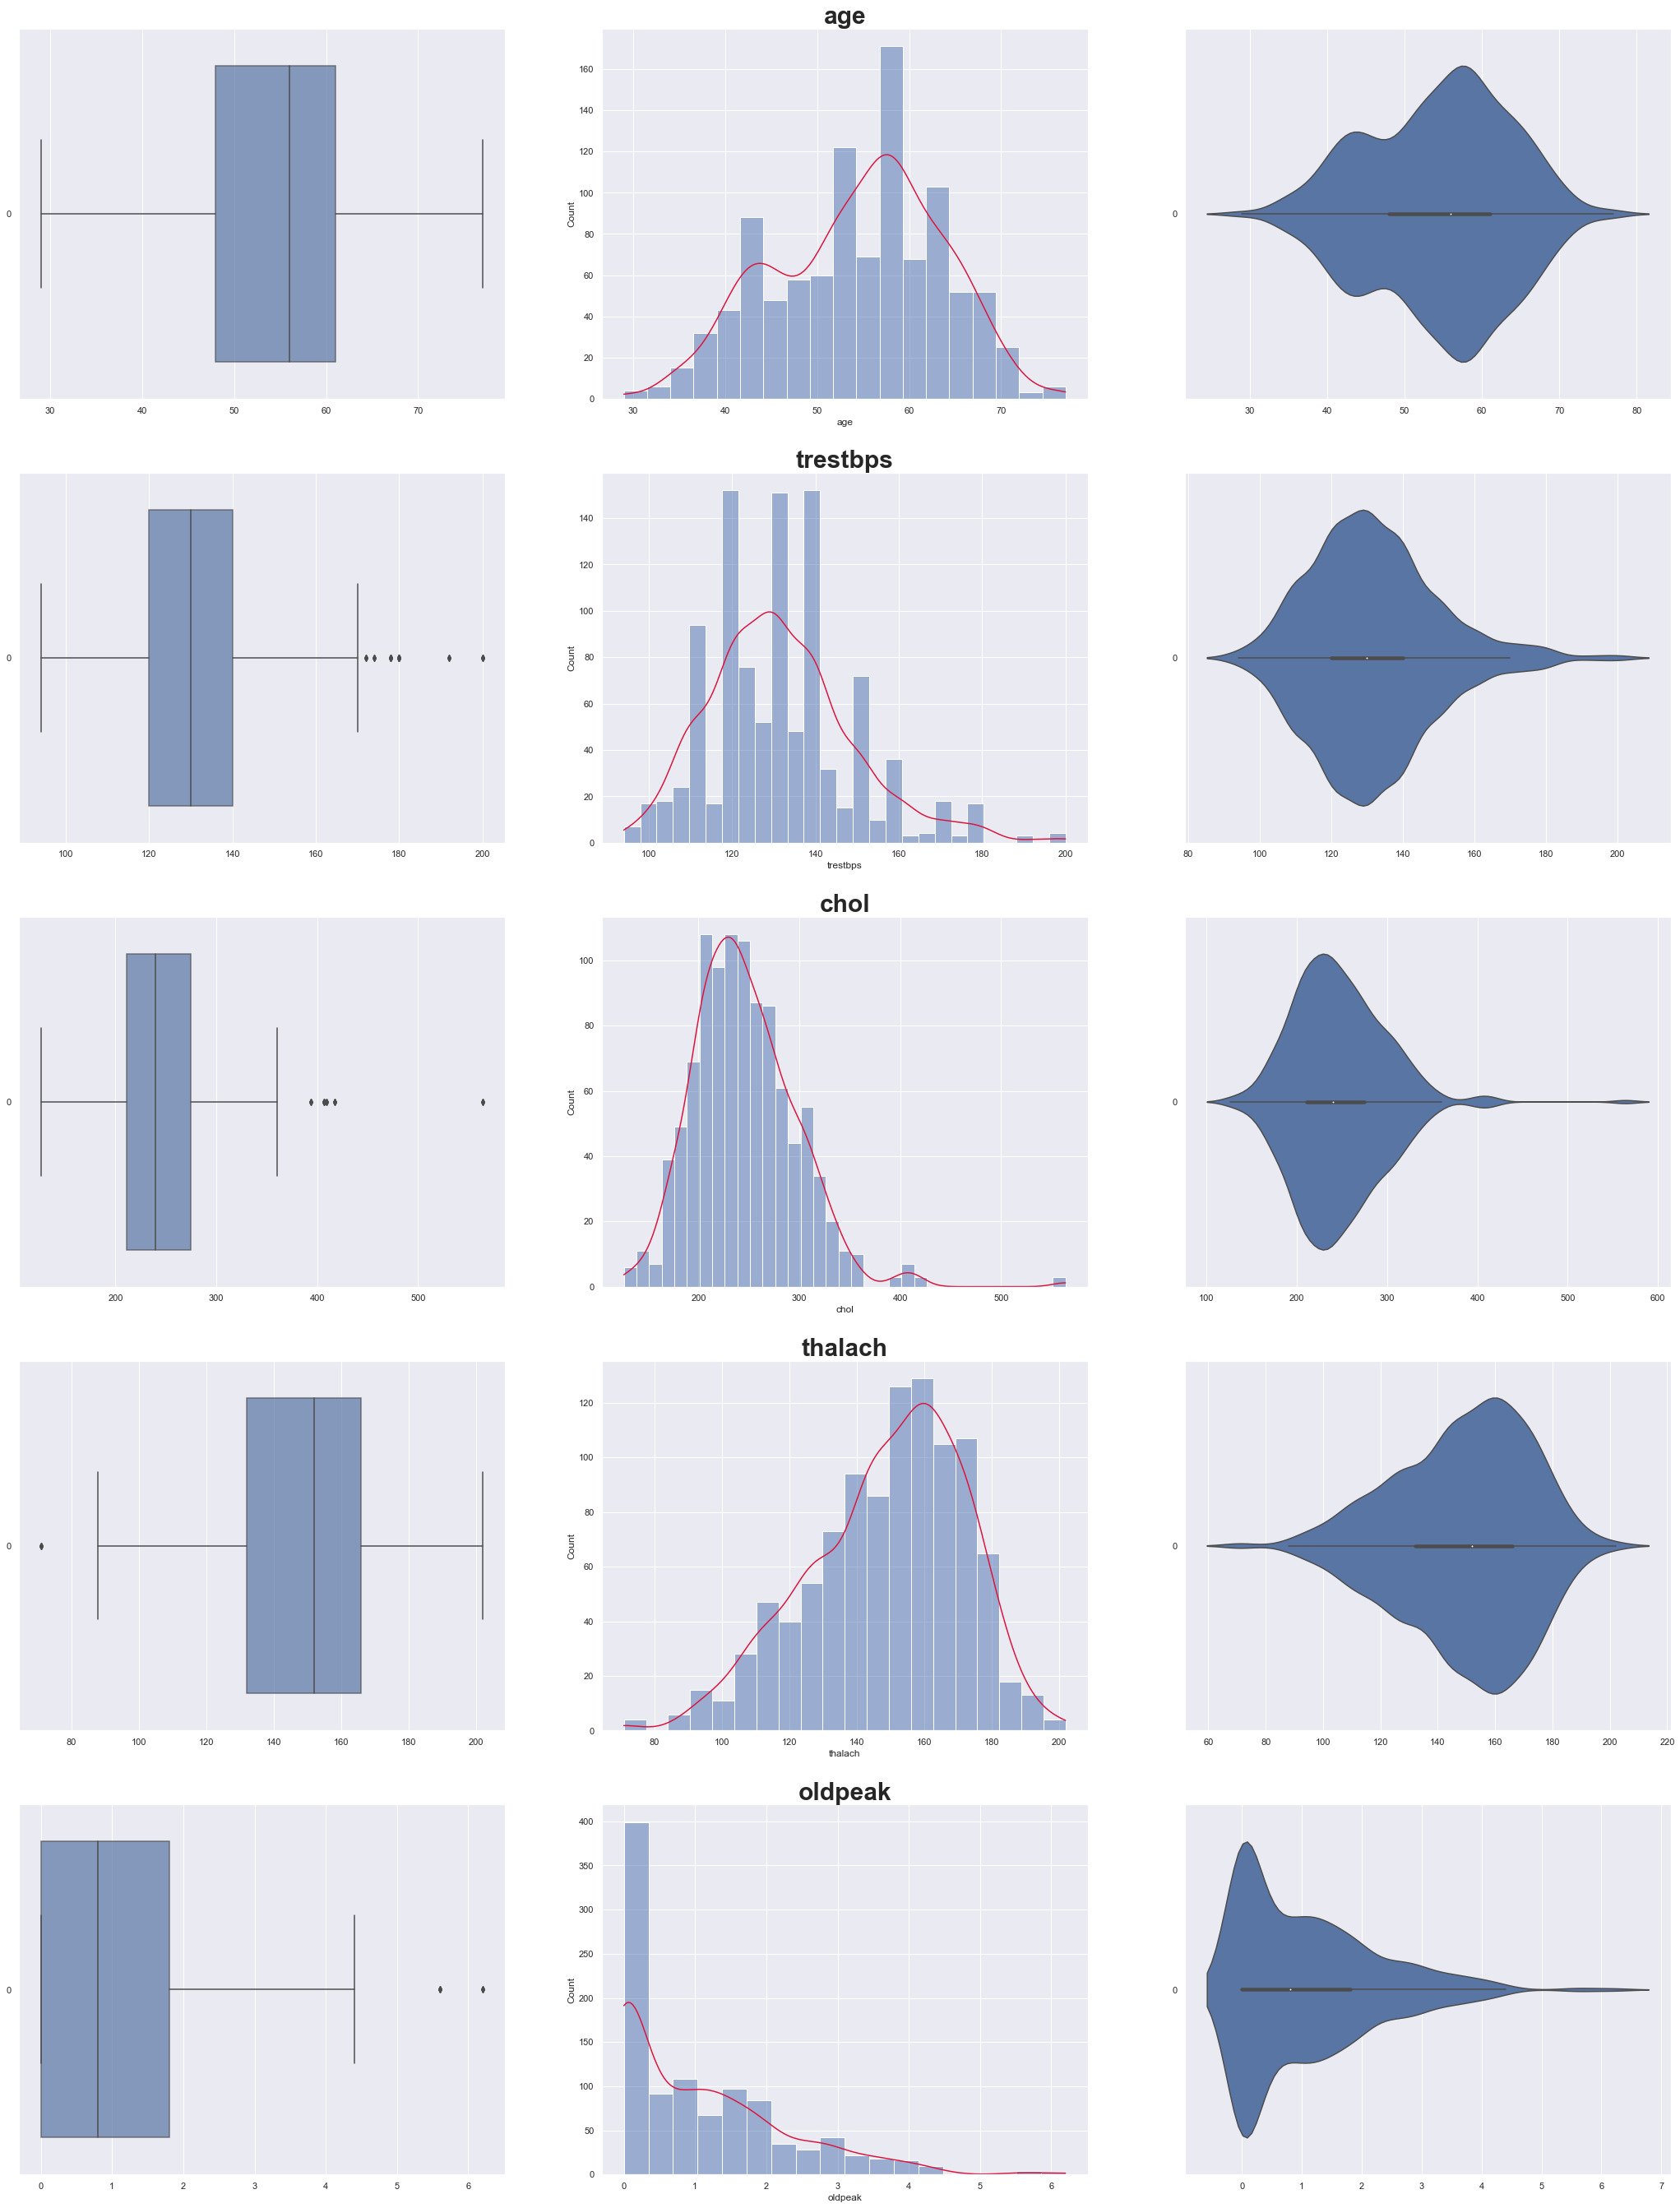

In [49]:
f, axes = plt.subplots(5, 3, figsize=(36, 48))

count = 0
for feature in cont:
    sb.boxplot(data = df_new[feature], orient='h', ax=axes[count,0], boxprops=dict(alpha=.7))
    g = sb.histplot(data=df_new[feature], ax=axes[count,1], kde=True)
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    g.lines[0].set_color('crimson')
    sb.violinplot(data=df_new[feature], orient='h', ax=axes[count,2])
    count+=1

<u>What can be observed?</u>

Just from observation of the violin plots alone, we can tell that `trestbps`, `oldpeak` and `chol` are positively-skewed, while `thalach` and `age` are negatively-skewed. This can be confirmed by the skewness values.

In [50]:
print("Skewness:")
df_new[cont].skew(axis=0)

Skewness:


age        -0.248866
trestbps    0.739768
chol        1.074073
thalach    -0.513777
oldpeak     1.210899
dtype: float64

The rule of thumb for skewness levels is as follows:
- If the skewness is between -0.5 and +0.5, the data is fairly symmetrical.
- If the skewness is between -1 to -0.5 or +0.5 to +1, then the data is moderately skewed.
- Any skewness value beyond this range is considered highly skewed.

According to this rule of thumb, we see that `chol` and `oldpeak` are highly skewed, and `trestbps` is moderately-skewed. As such, we will consider normalizing the data to fit a normal distribution during the data preprocessing stage later.

<h4>Categorical Variables</h4>

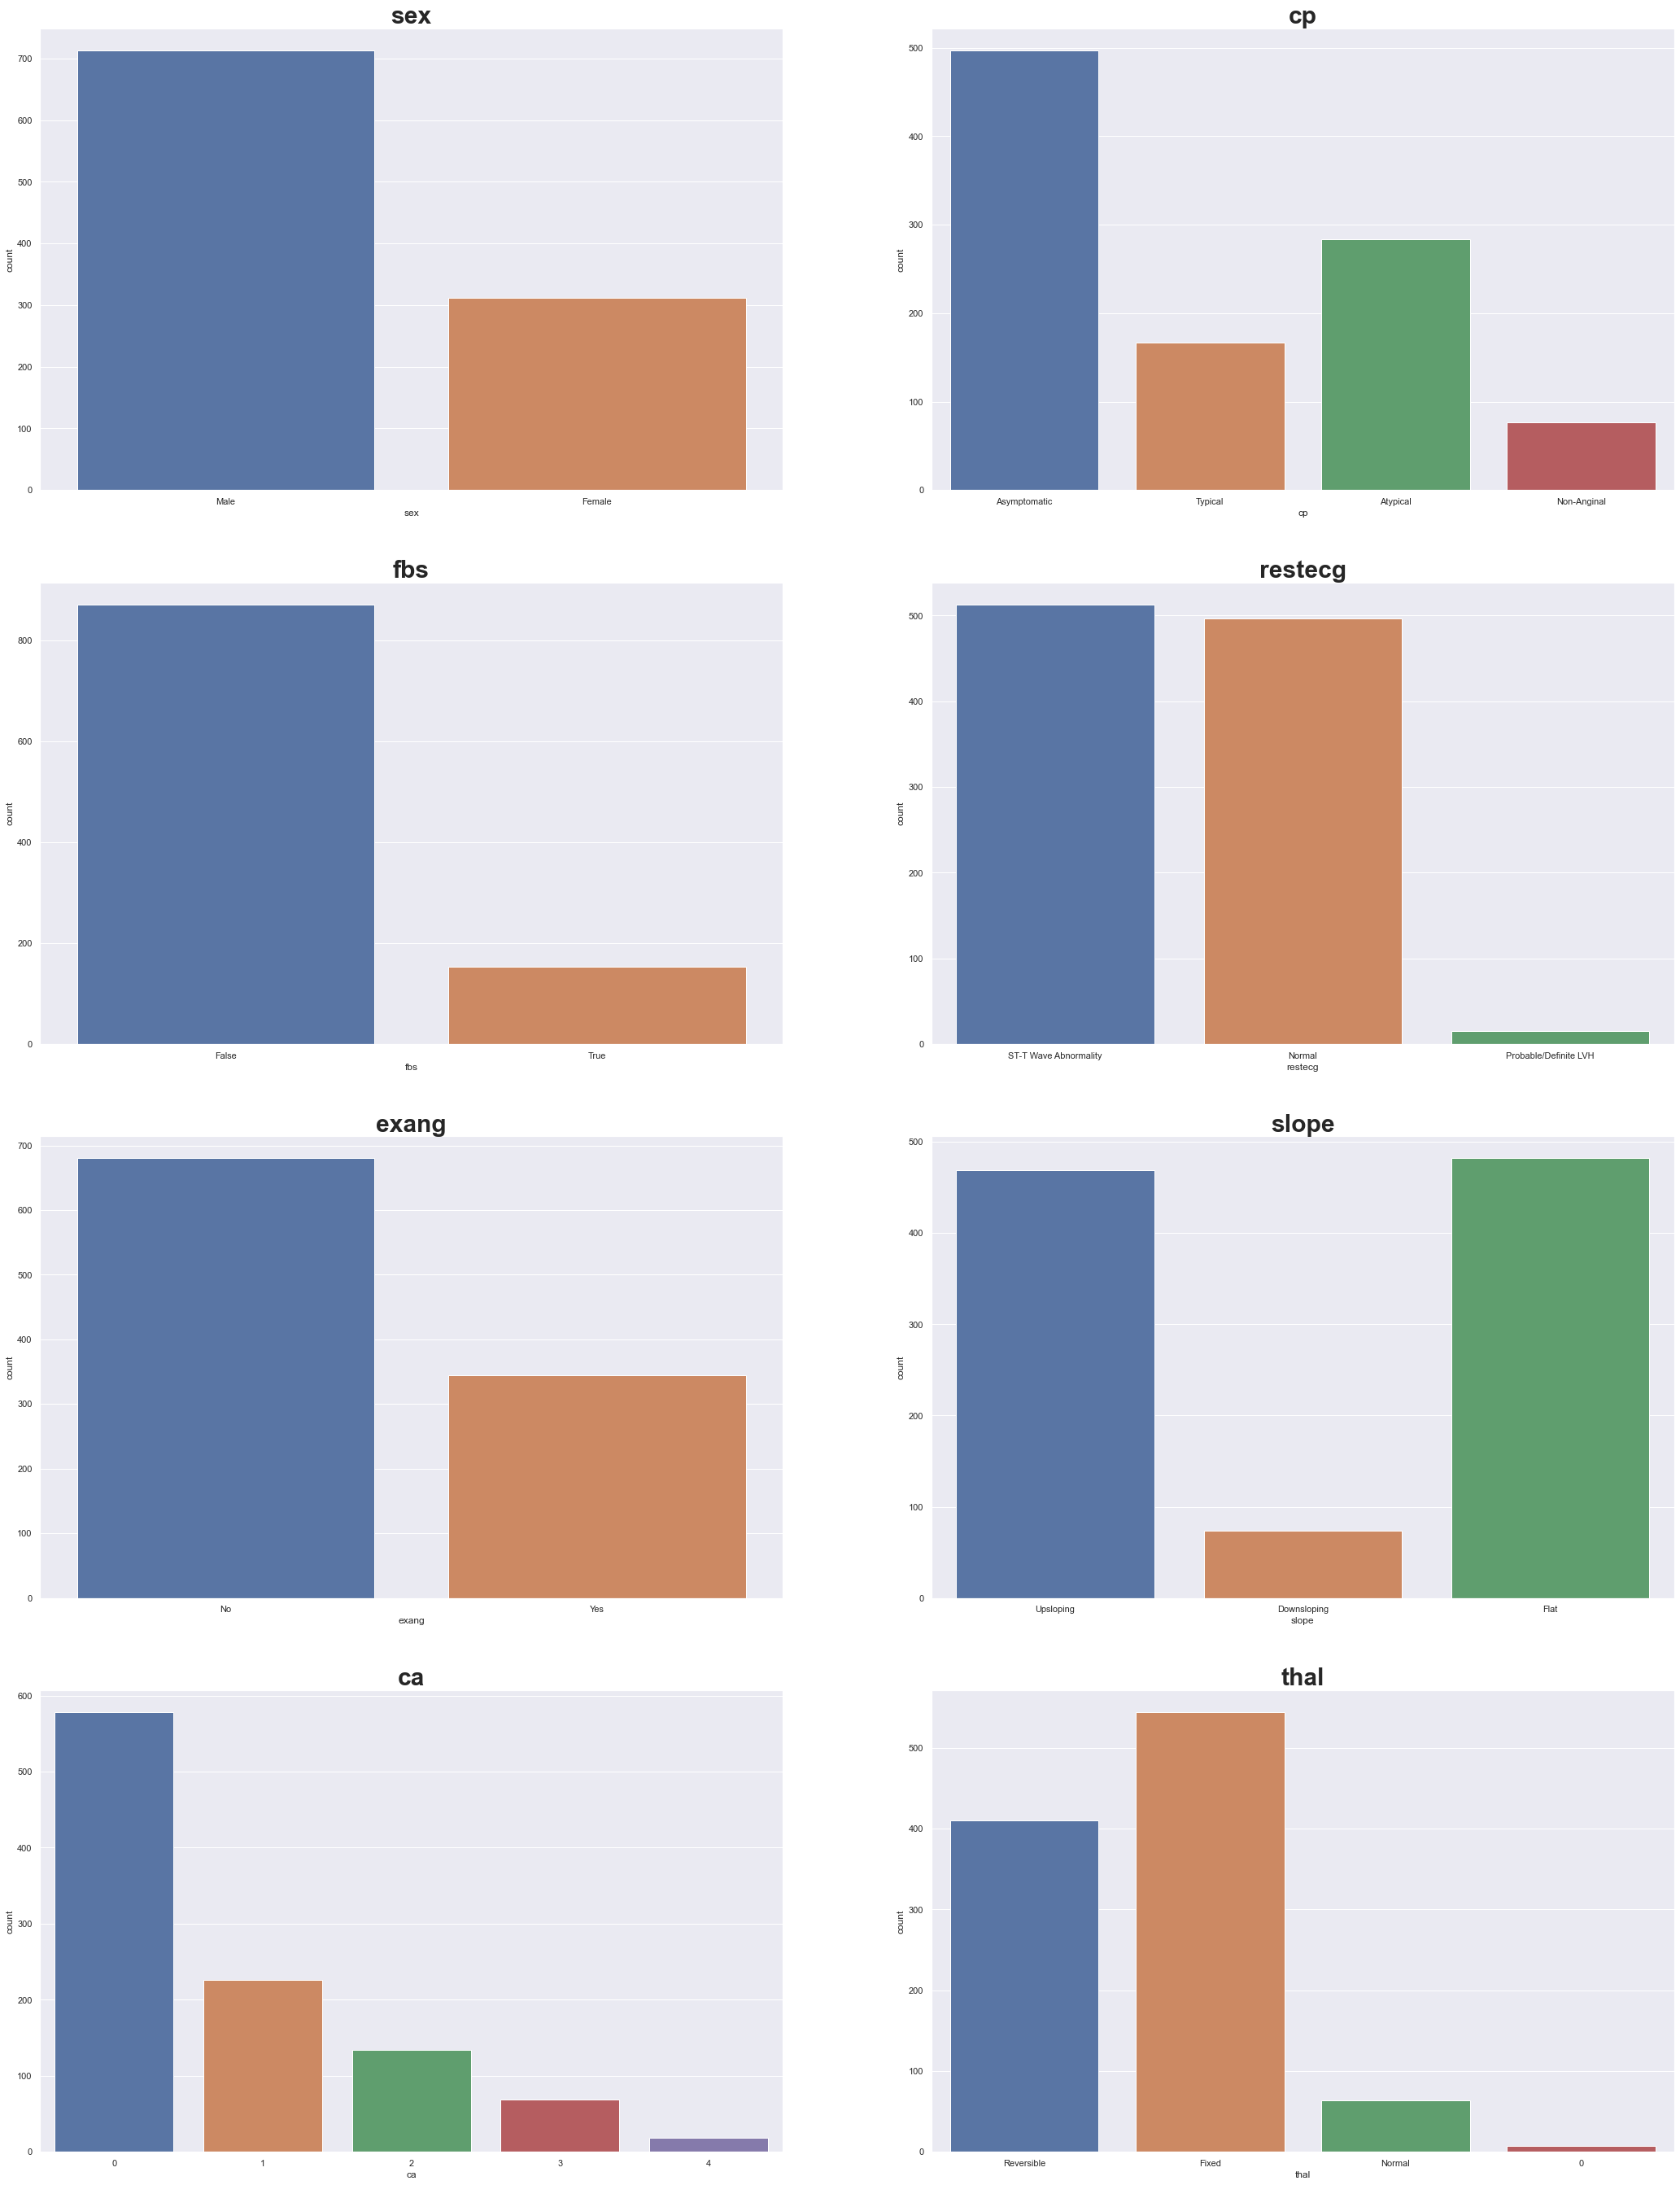

In [51]:
f, axes = plt.subplots(4, 2, figsize=(36, 48))

h = v = 0
for feature in cat:
    if feature == 'target': break;
    if h == 2: 
        h = 0 
        v += 1
    g = sb.countplot(data=df_new, x=feature, ax=axes[v,h])
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    h+=1

By observing the distribution of each categorical variable from the plots, we see that there are unknown classes `thal = 0` and `ca = 4` not defined in the data_description.txt file. This will be dealt with in the data preprocessing stage.

<h3>Bivariate / Multivariate Analysis</h3>

Now we will explore the relationships between the predictors and the response variable. In addition, we will check for correlative properties between predictors.

<h4>Distribution of Continuous Variables against Response</h4>

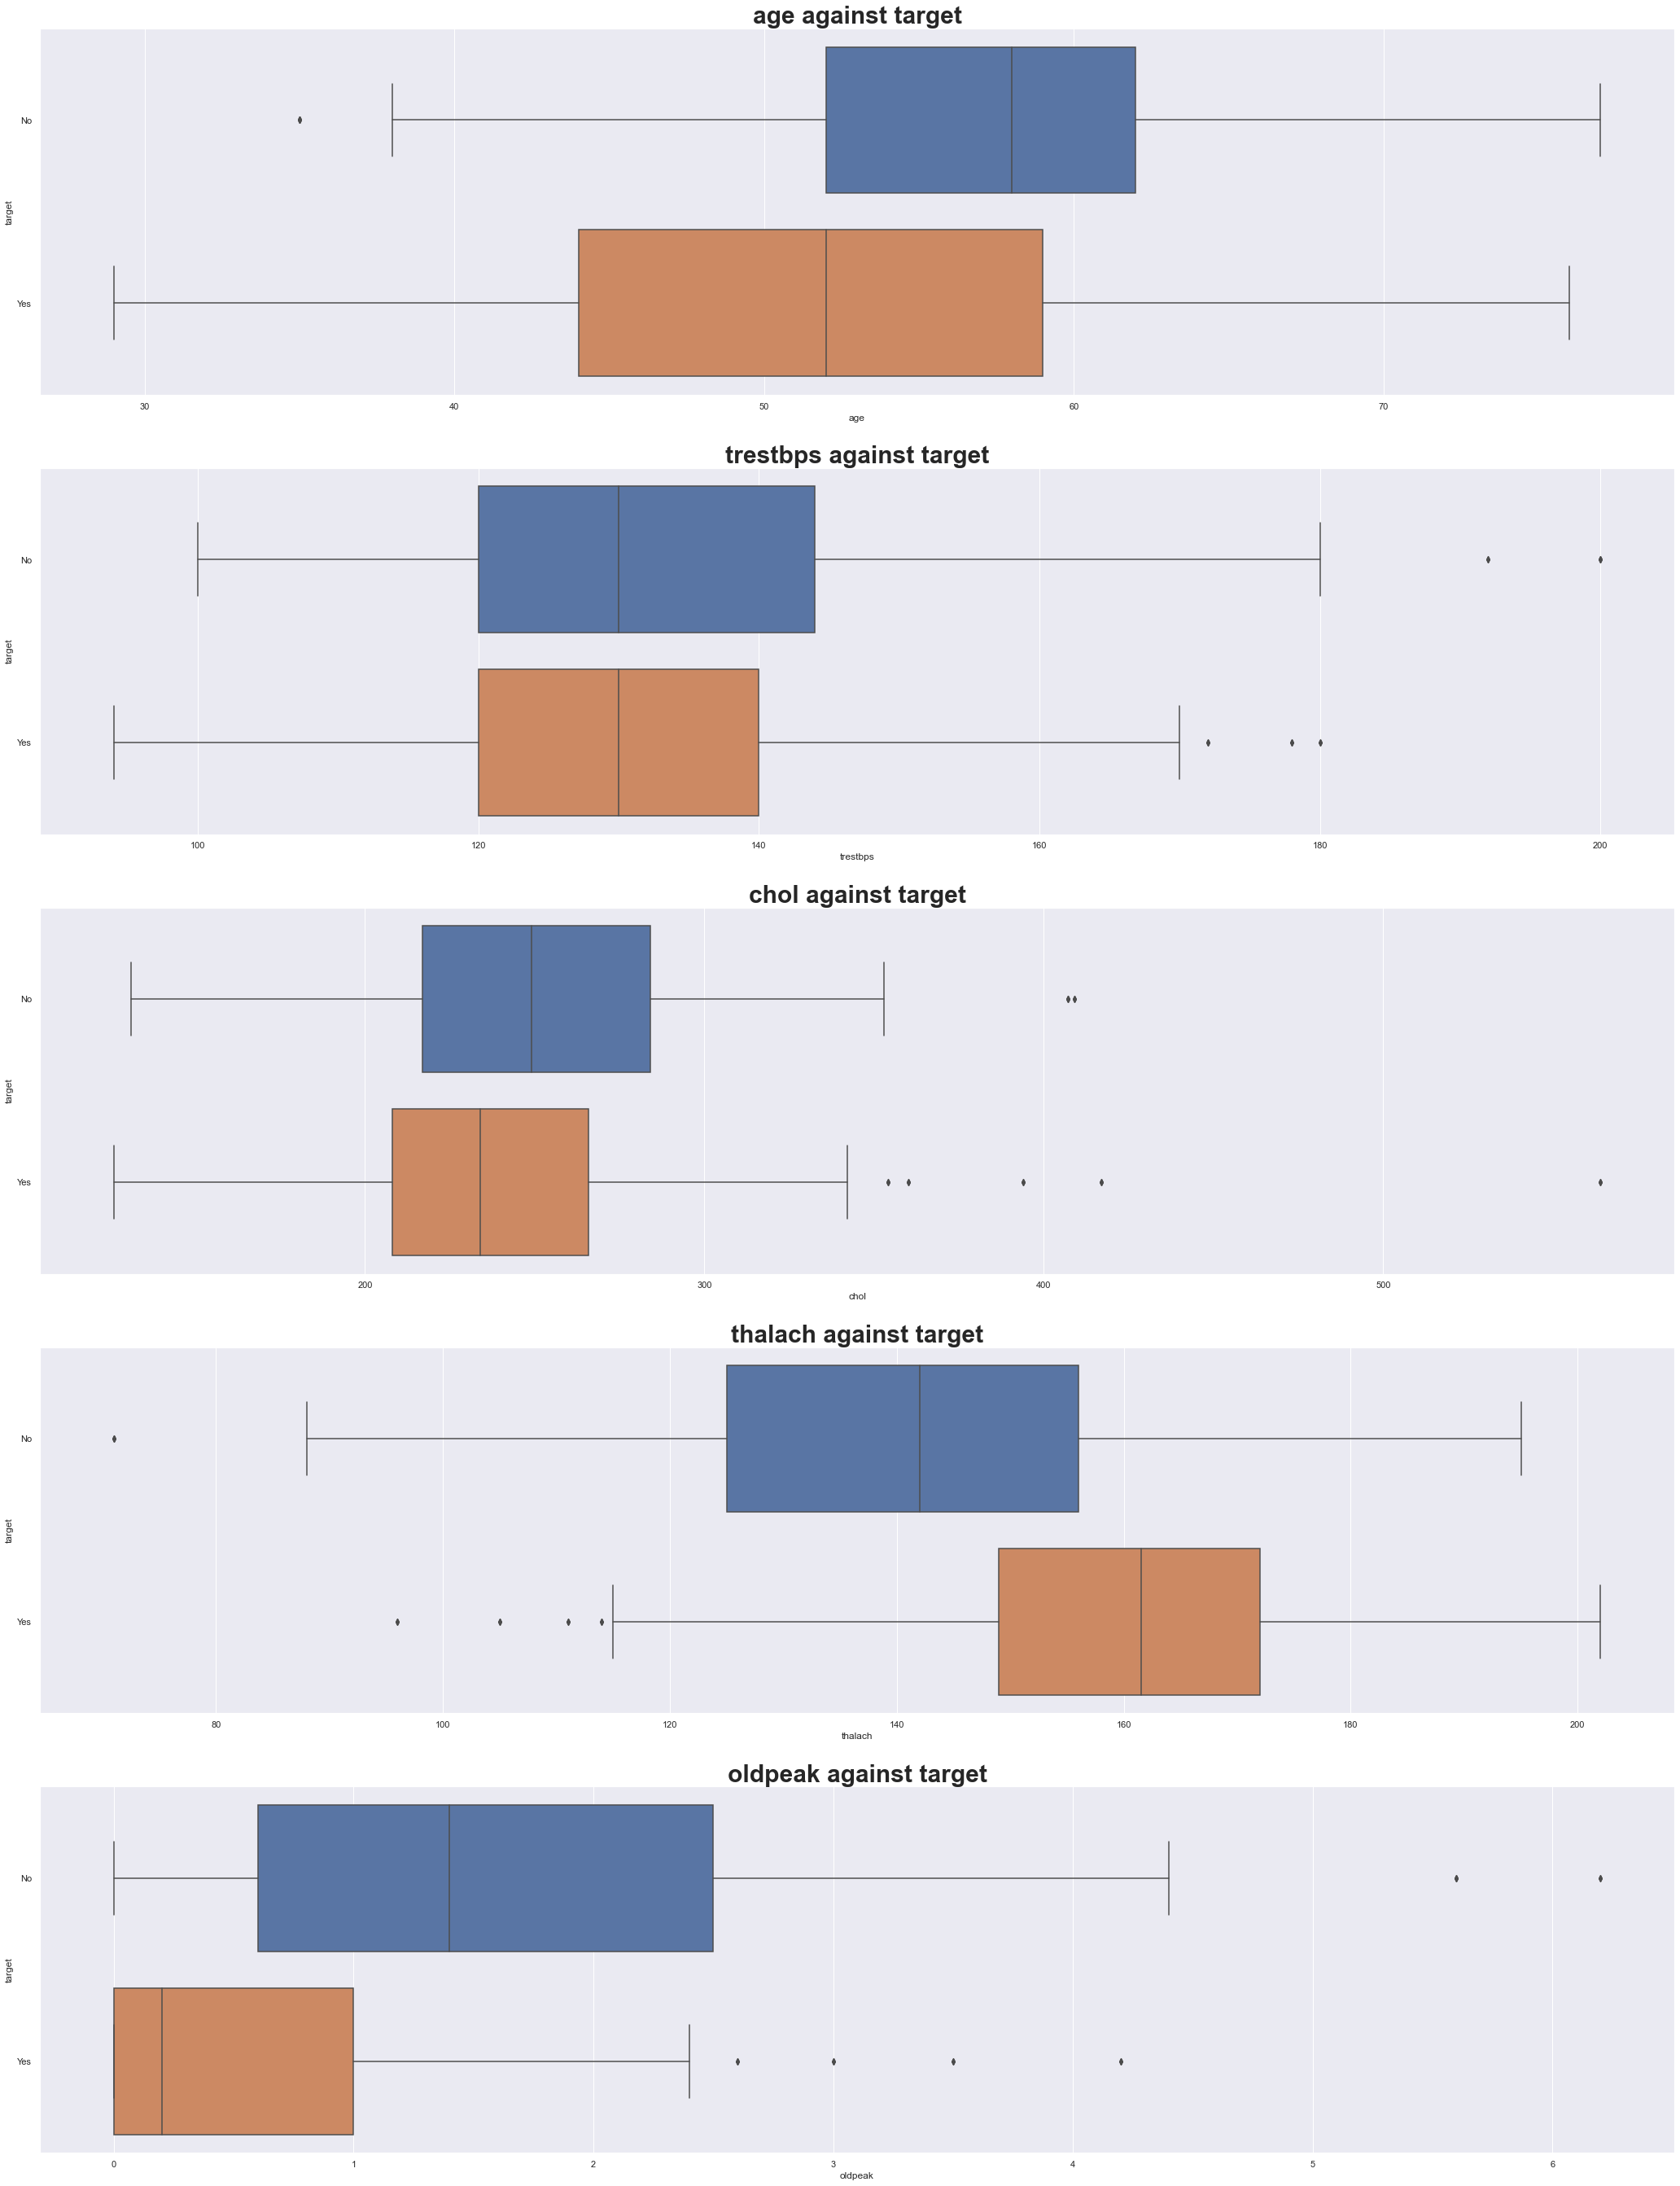

In [52]:
f, axes = plt.subplots(len(cont), 1, figsize=(36,48))

count = 0
for feature in cont:
    g1 = sb.boxplot(data=df_new, x=feature, y='target', orient='h', ax=axes[count])
    title = feature + ' against target'
    g1.set_title(title, fontdict={'fontsize':30, 'fontweight':'bold'})
    count += 1

<u>What do the data distributions tell us?</u>

For each predictor against `target`, how distinct the data distributions are for each class "Yes" and "No" will give us a rough idea of the predictive quality of the predictor. This can be determined by observing how far apart the <b>median</b> is for both distributions.

For instance, for `thalach`, it can be observed that the median for `target = Yes` lies outside of the box containing 50% of the distribution for `target = No`. This implies that there is a difference between both distributions such that distinct partitions can be made to segregate the data between patients with heart disease and patients without. Therefore, `thalach` may help the predictive model in making better predictions on the data. 

The same goes for `age` and `oldpeak`.

On the other hand, the median of both distributions under `chol` are only minimally distinct, implying that `chol` is not a good predictor for helping the predictive model in making predictons on the data between both classes `target = Yes` and `target = No`. In fact, `trestbps` is even worse in this regard, as the median of both distributions are virtually equal to each other.

<br>

Now, we will make further observations of the distributions between each predictor and the response variable `target`.

First, let's take a look at the `age` group distribution for `target = Yes` and `target = No`.

In [53]:
# create new categorical variable 'age group'
df_temp = df_new.copy()
df_temp['age'] = pd.cut(x=df_temp['age'], bins=[0,19,29,39,49,59,69,79,89,99], 
                        labels=["≤19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"])

<AxesSubplot:xlabel='age', ylabel='count'>

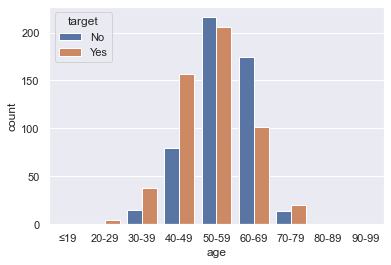

In [54]:
sb.countplot(data=df_temp, x='age', hue='target')

We see that there are more recorded instances of people with heart disease over people without heart disease in the age groups of `30-39` and `40-49`, and on a lesser scale, for the age group of `70-79`. This may be an indicator that people in these age groups are more susceptible to heart disease than people in other groups.

Meanwhile, the opposite is true for the age group `60-69`, while the age group of `50-59` is more or less balanced.

<br>

<h4>Categorical Variables against Response</h4>

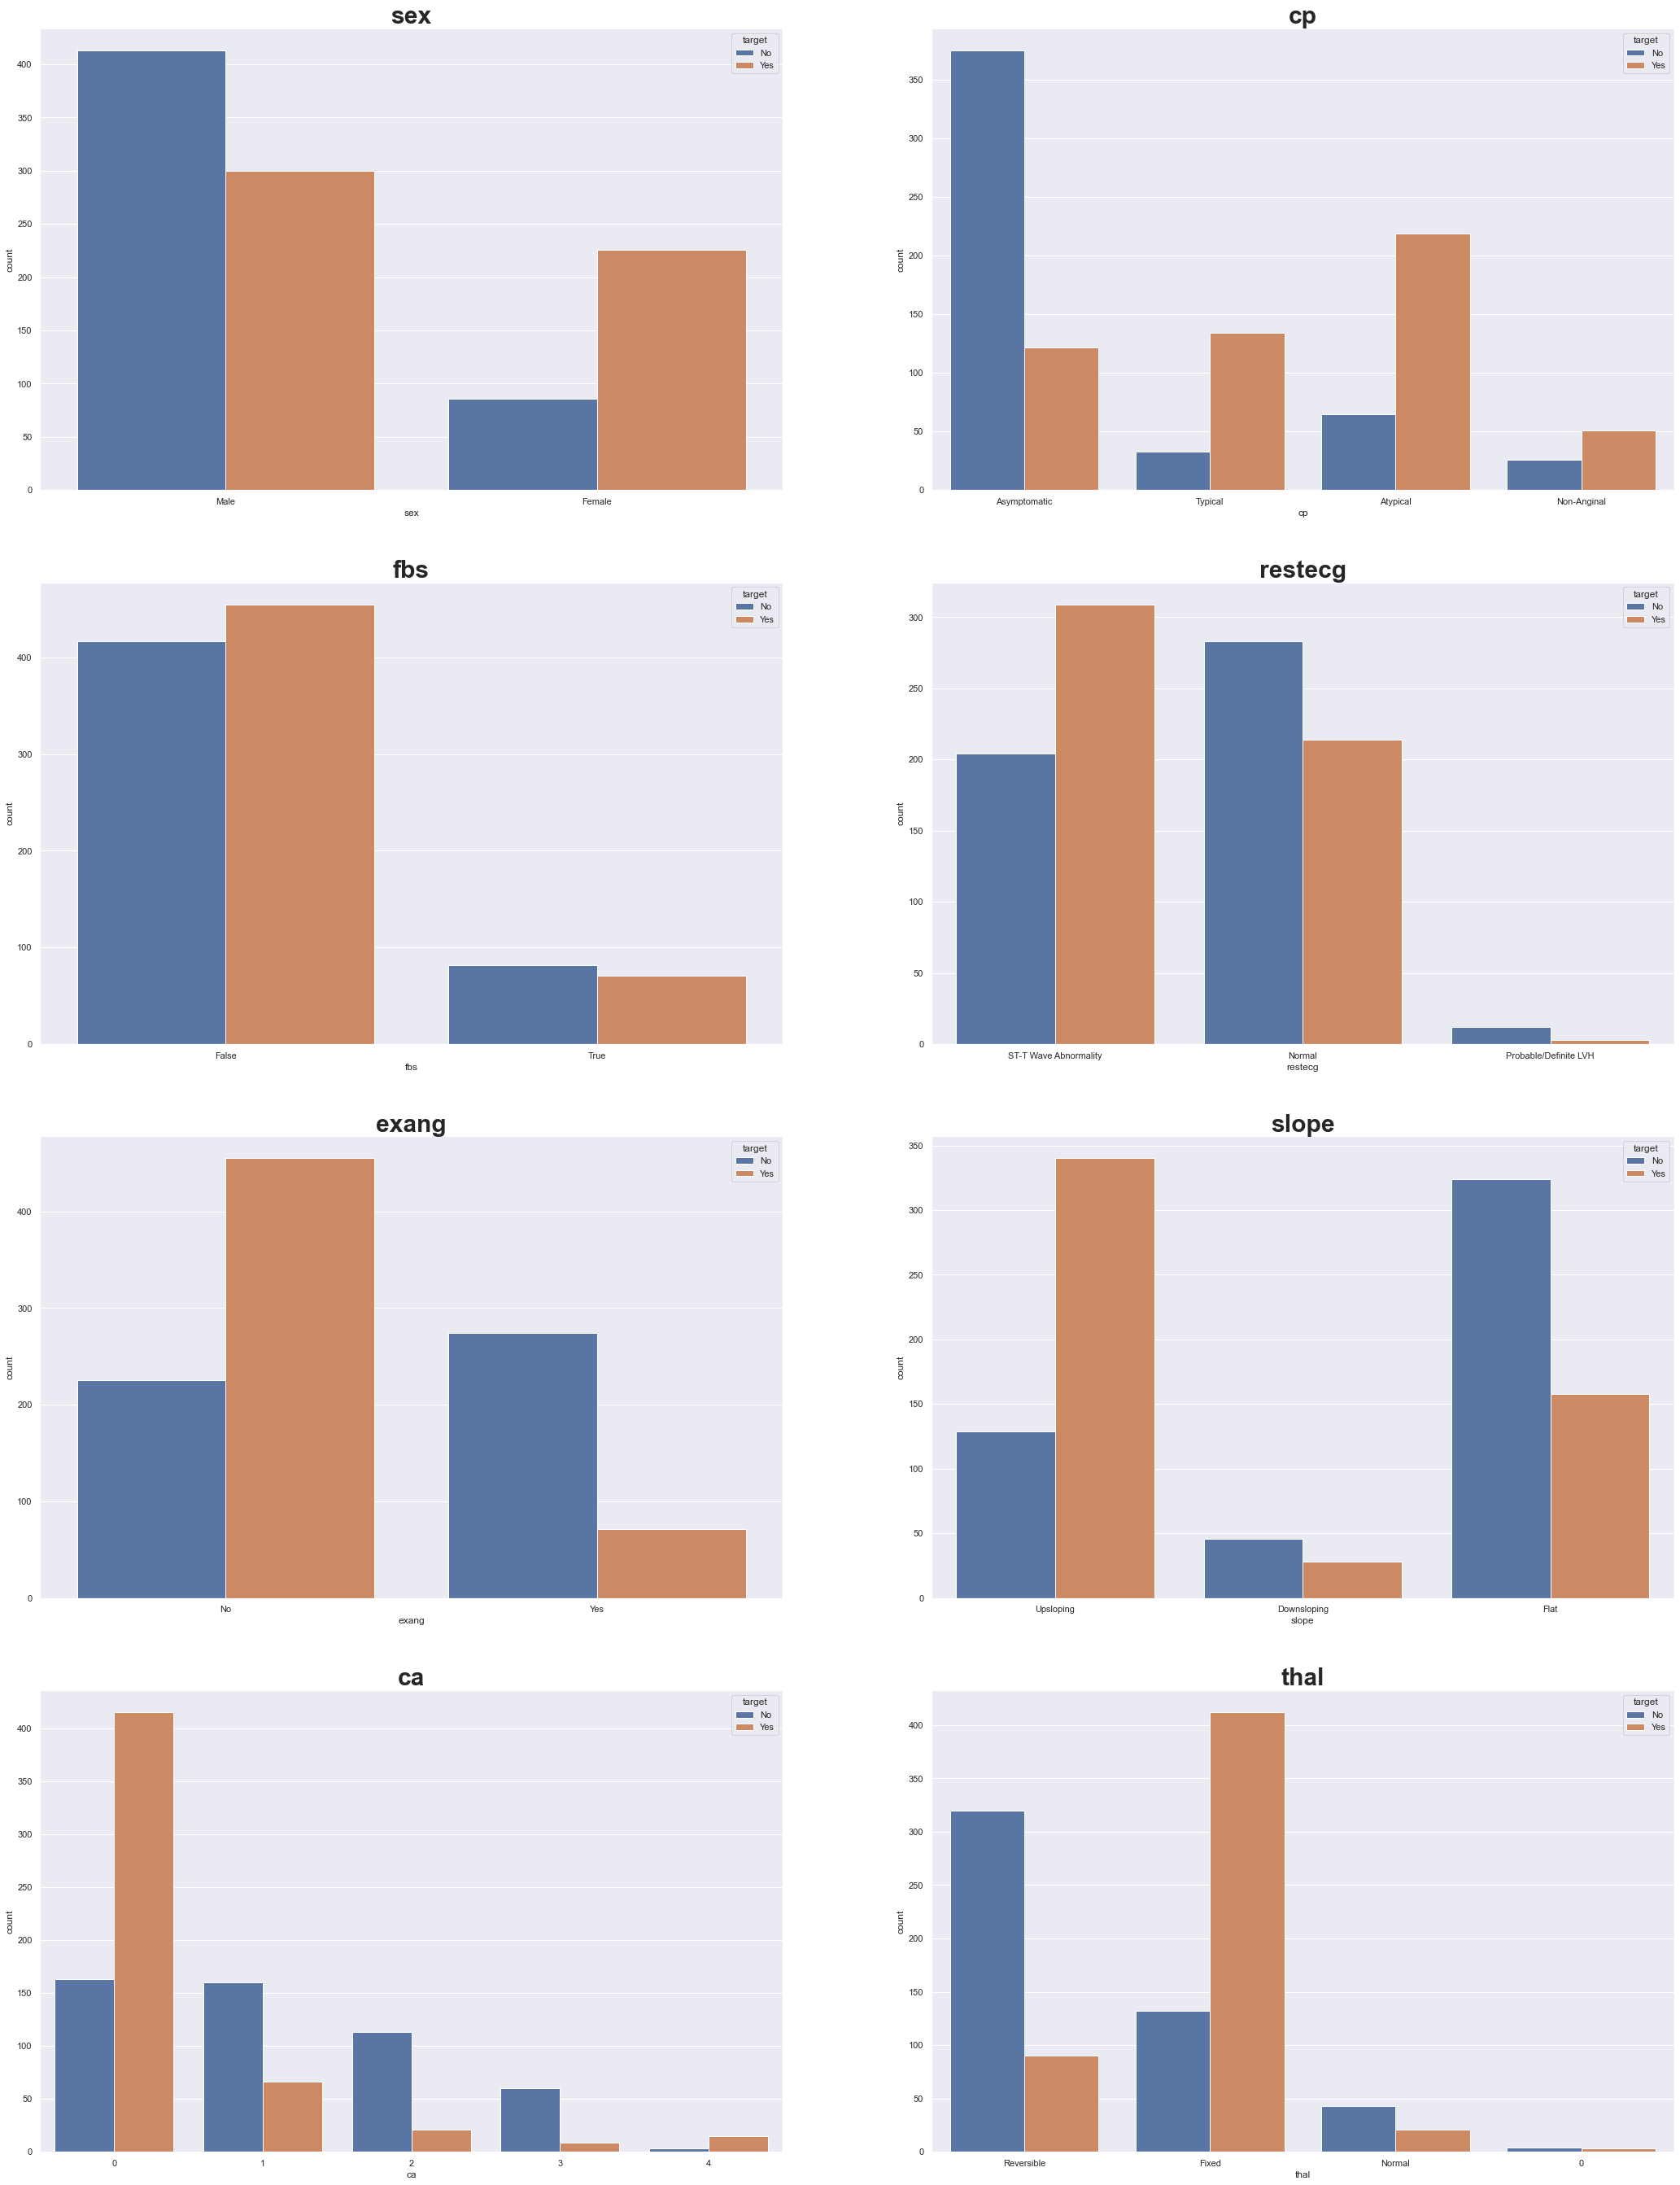

In [55]:
f, axes = plt.subplots(4, 2, figsize=(36, 48))

h = v = 0
for feature in cat:
    if feature == 'target': break;
    if h == 2: 
        h = 0 
        v += 1
    g = sb.countplot(data=df_new, x=feature, hue='target', ax=axes[v,h])
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    h+=1

The following observations for the relationship between each variable and `target` can be made:
* For `sex`, it appears that Female patients are less susceptible to heart disease than Males, judging from the class distribution.
* For `cp`, it appears that asymptomatic patients are significantly less susceptible to heart disease, as expected. Additionally, those with typical and atypical chest pain of the anginal type, which refers to chest pain caused by insufficient blood flow to the heart, are more susceptible to heart disease than those of the non-anginal type, which is also expected.
* Not much insights can be derived from the `fbs` bar plot, as the classes are largely balanced. Just like `chol`, this may be an indication that this specific variable may not contribute much to the predictive model as a distinction between the classes of the response variable `target` can not be made easily with `fbs`.
* For `restecg`, the distinction between `target = 0` and `target = 1` for each of its classes are only slightly more prominent as compared to `fbs`.
* For `exang`, which refers to exercise-induced anginal pain, it appears that patients without exercise-induced anginal pain are more likely to have heart disease than those who experience anginal pain while performing exercise. This is an indication of <b>unstable angina</b>, which refers to heart pain even during rest, and is a common indication of heart-related problems.
* According to the National Library of Medicine, the treadmill ECG stress test is commonly used to screen for heart-related problems, often evaluated by changes to the ST segment, which is recorded `slope`. If there are changes to the peak ST segment (upsloping/downsloping) during exercise, then it is an indication of heart-related issues. The data clearly makes this distinction: patient who have an upsloping peak ST segment typically are those with heart disease, while those who have a flat peak ST segment are typically those without. This makes `slope` another good predictor for helping us predict heart disease.
* `ca` refers to the number of major vessels colored during fluoroscopy, which is an imaging procedure for observing blood flow and blockages in the major vessels. Vessels not colored are likely blocked vessels, indicating a lack of blood flow and therefore are an indication of heart-related problems. From the plot, there is an overwhelming no. of patients with zero vessels colored that have heart disease. On the other hand, the ratio for patients with any number of vessels colored leans towards no heart disease. Both of these observations follow from the medical perspective and therefore `ca` may be a strong predictor for helping us predict heart disease.
* `thal` refers to the presence of thalassemia, which is a blood disorder that leads to less healthy red blood cells = reduced blood flow = increased risk of heart-related issues. For patients without this disorder (`thal = normal`) and those with thalassemia but have normal blood flow (`thal = reversible`), a strong distinction can be made that leans towards patients without heart disease, which lines up with medical knowledge. On the contrary, patients with fixed thalassemia (`thal = fixed`), who experience reduced blood flow, are distinctly more susceptible to heart disease according to the bar plot. A class separation between those with heart disease and those without can thereby be made confidently using `thal`.

From these observations, we see that all of the categorical variables, less `restecg` and `fbs`, appear to be highly relevant for predicting the presence of heart disease.

<h4>Correlation Matrix</h4>

As the final step for our exploratory data analysis, we will plot several correlation matrices that will help us explore the correlation between the response variable `target` and its predictors. The goal is to identify which features are more relevant to `target`, which will help us when performing the feature selection phase for tuning our predictive model in the later stages.

First, we want to find the correlation between the continuous variables and the response variable `target`.

We will use <b>point biserial correlation</b>, which calculates the relationship between a binary variable and a continuous variable. In this case, the binary variable is our response variable `target`, and the continuous variables are our continuous predictors.

https://www.statology.org/point-biserial-correlation-python/

For point biserial correlation, it can take on values between -1 and 1, where:
- -1 indicates perfect negative correlation
- 0 indicates no correlation
- 1 indicates perfect positive correlation

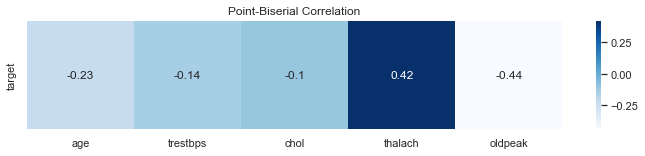

In [56]:
from scipy.stats import pointbiserialr as pbs

pbs_results = []

# Point biserial correlation
for feature in cont:
    pbs_results.append(pbs(df[feature], df['target'])[0])

# Plot heatmap
fig = plt.figure(figsize=(12,2))
sb.heatmap([pbs_results], annot=True, cmap='Blues', 
           xticklabels=cont, yticklabels=['target'])
plt.title("Point-Biserial Correlation")
plt.show()

From the heatmap, the following observations can be made:
- `thalach` is moderately positively-correlated with `target` with correlation = 0.42
- `oldpeak` is moderately negatively-correlated with `target` with correlation = -0.44
- the other variables are only mildy correlated with `target`

From this, an inference can be made: `thalach` and `oldpeak` may be useful in increasing the predictive model's accuracy in classifying between patients with or without heart disease.

<br>

Next, we would like to find the correlation between our categorical variables and the response variable `target`. For this, we will use a <b>chi-square test</b> which finds the correlation between two categorical variables.

https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/

When performing the Chi-Square test, we have to consider two hypotheses in order to evaluate the p-square value obtained from the test:
1. H0 (p-square > 0.05): the variables compared are independent of each other.
2. H1 (p-square <= 0.05): the variables are dependent.

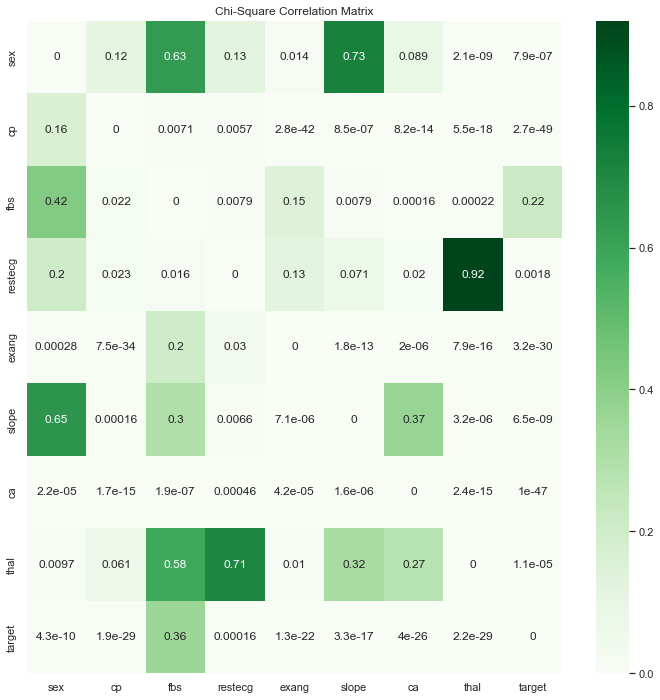

In [57]:
from sklearn.feature_selection import chi2

newcat = cat + ['target']

chi2_results = pd.DataFrame(data = [(0 for i in range(len(df[newcat].columns))) for i in range(len(df[newcat].columns))],
                            columns = newcat)
chi2_results.set_index(pd.Index(newcat), inplace = True)

# perform Chi-Square test
for i in newcat:
    for j in newcat:
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            chi2_results.loc[i, j] = p_val

# plotting heatmap with Chi-Square test results
fig = plt.figure(figsize=(12,12))
sb.heatmap(chi2_results, annot=True, cmap='Greens')
plt.title("Chi-Square Correlation Matrix")
plt.show()

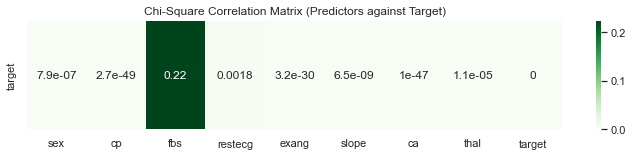

In [58]:
# plotting heatmap with Chi-Square test results (against "target" only)
chi2r_target = chi2_results['target']
fig = plt.figure(figsize=(12,2))
sb.heatmap([chi2r_target], annot=True, cmap='Greens', 
           xticklabels=newcat, yticklabels=['target'])
plt.title("Chi-Square Correlation Matrix (Predictors against Target)")
plt.show()

It can be observed that all of the categorical variables, with the exception of `fbs`, have high correlation with `target` according to their p-values.
- `fbs` has p-value = 0.22. As its p-value > 0.05, the hypothesis H1 is rejected and therefore according to the Chi-Square test there is no conclusive evidence that `fbs`and the response variable `target` are dependent on each other.
- The other categorical variables have p-value <= 0.05. Therefore, the hypothesis H0 is rejected and it can be said that these predictors have high correlation with `target` according to the Chi-Square test.

From these correlation matrices, the findings for the correlation of predictors against response are as follows:
- for categorical predictors, `fbs` seems to have the lowest correlation with `target`, according to the Chi-Square test.
- for continuous predictors, `thalach` and `oldpeak` seem to be moderately correlated with `target`, while the other predictors have low correlation.

These findings may help reinforce our choice for feature selection in the data preprocessing stage.
<br>

<h2>Data Preparation</h2>

Through the observations produced from Exploratory Data Analysis, we have gained a better understanding of our data. But before embarking on predictive modeling, we first need to clean and preprocess the data such that it is more easily parsed by the classifier model during the training stage, which:
- Improves model accuracy
- Improves time efficiency in training the model
- Prevents overfitting

<h3>Data Cleaning</h3>

From our observations on the predictor `thal`, there appears to be a class `0` which is not mentioned in the description of the dataset.

In [59]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

There are seven instances of `thal = 0`. These are the samples where `thal` was not recorded, and therefore it is MNAR (Missing Not As Random), meaning our observed samples cannot explain the missing data. Therefore, we cannot simply remove the samples with `thal = 0`, especially since these samples may contain useful information for training our model. There is a need for data imputation.

Unvariate methods for missing data imputation, like the mean/median/mode, are simplistic ways of estimating the value of the missing data, and may not provide an accurate depiction of the sample in relation to its other variables. As such, we will use Sci-Kit Learn's <b>KNNImputer</b>, which identifies neighboring samples similar to the incomplete sample to provide an estimation for the missing data.

In [60]:
# initialize KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# convert `thal = 0` values to NaN
df['thal'] = df['thal'].convert_dtypes()
df.loc[df['thal'] == 0, 'thal'] = np.NaN

# use KNNImputer
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed['thal'] = np.round(df_imputed['thal'])
df_imputed = df_imputed.astype(df.dtypes.to_dict()) # retain data types from original dataset

In [61]:
df_imputed['thal'].value_counts()

2    551
3    410
1     64
Name: thal, dtype: Int64

<br>

From our observations on the predictor `ca`, there appears to be a class `4` which is not mentioned in the description of the dataset.

In [62]:
df_imputed['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

There are 18 instances of `ca = 4`, which account for approximately 1% of the samples. Unlike the previous example with `thal = 0` where we clearly know that it is missing data, here `ca = 4` has some meaning that we do not know. Refer back to the definition for `ca`: it is the number of major vessels colored by fluoroscopy from 0 ~ 3. Therefore, `ca = 4` does not make sense in the context of this definition for `ca`.

By analyzing the dataset, we realize that `ca = 4` can be complained explained by the `sex` variable: every sample with `ca = 4` has `sex = 1` AKA male patients. This is an observation that is unique to `ca = 4`.

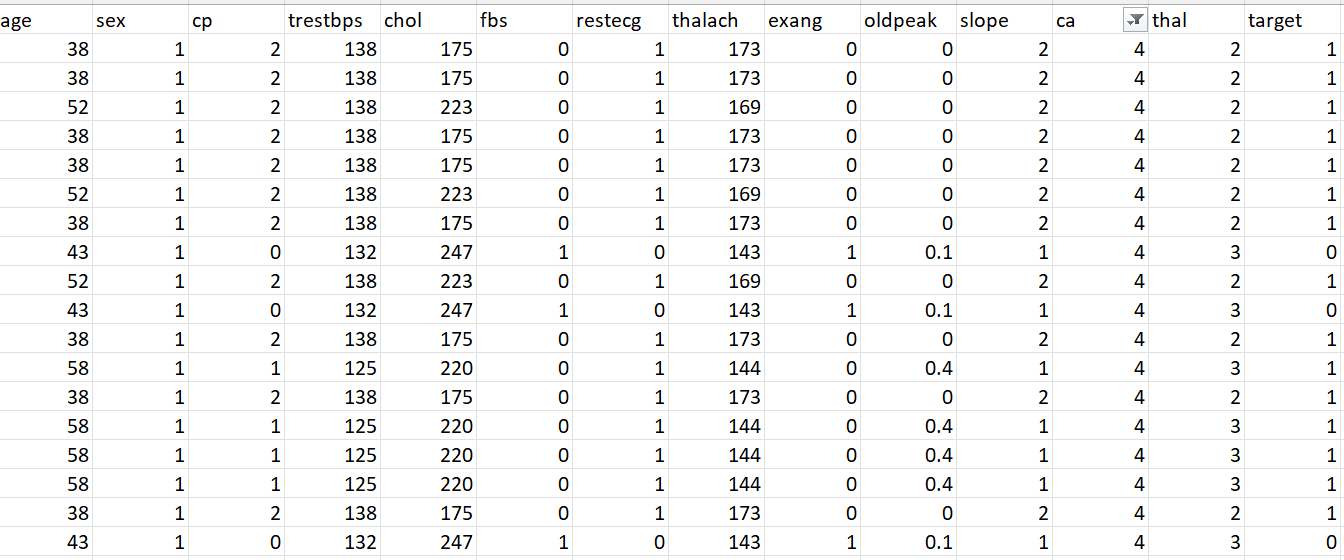

As such, it would not be accurate to replace the samples with `ca = 4` via data imputation, as it has a relationship with another variable. This relationship may influence how the classifier model is trained and predicts heart disease, and as such, we have decided to delete these samples from the dataset, since:
1. We cannot make assumptions of the meaning for `ca = 4` and therefore this particular class would not be able to contribute any value for the predictive model, and;
2. As there are only 18 samples for `ca = 4` which constitute 1% of the total dataset, removal of the samples will not be a huge loss for the predictive accuracy of the model.

In [63]:
df_imputed = df_imputed[df_imputed.ca != 4]
df_imputed['ca'].value_counts()

0    578
1    226
2    134
3     69
Name: ca, dtype: int64

<h3>Fitting Data to Normal Distribution</h3>

Here we are transforming the skewed data distributions identified during EDA to fit a normal distribution. A <b>normal distribution</b> is a nearly perfectly symmetrical distribution characterized by the mean, median and mode being close together, and the shape of the distribution can be seen as a bell curve. In machine learning, the normal distribution simplifies the model training process and leads to more precise predictions, and many predictive models in fact expect features with continuous data to follow a normal distribution, as this is the most simple yet natural form that a data distribution can take.

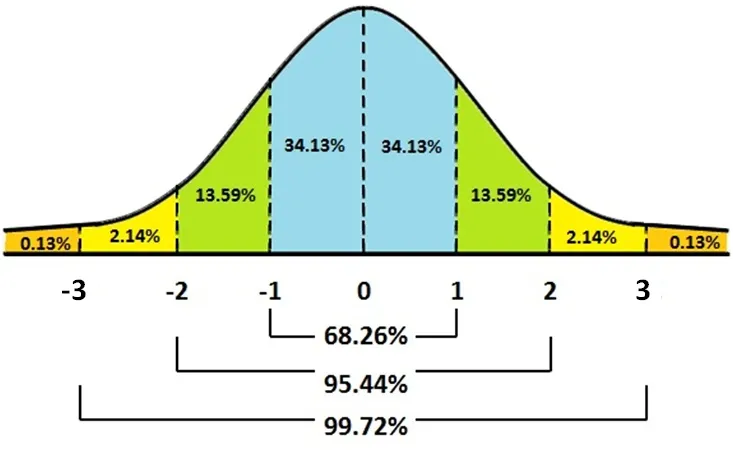

https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070
https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/
https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/ 

`chol`, `oldpeak` and `trestbps` have been identified earlier to be skewed beyond our acceptable range for skewness. Therefore, we will apply transformations on these columns such that the data fits a normal distribution better. As all these features are <b>positively-skewed</b>, we can consider applying the log transformation.

In [64]:
# temporary list
skew_list = ['chol', 'oldpeak', 'trestbps']
df_trans = df_imputed.copy()

for feature in skew_list:
    df_trans[feature] = np.log(df_trans[feature])

C:\Users\ymtbr\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Once the data has been transformed, now let's look at the distributions.

Blue: Before log transform
Green: After log transform


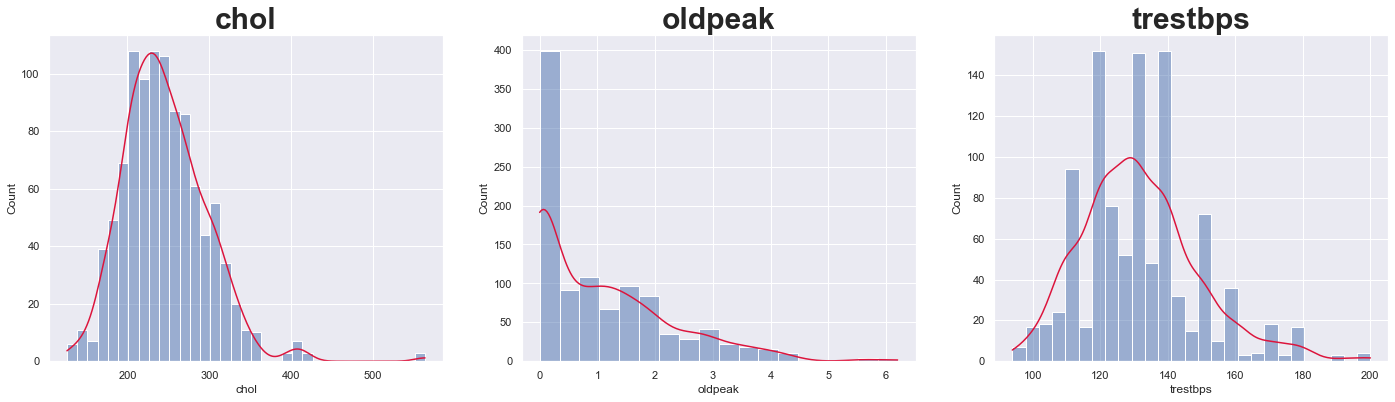

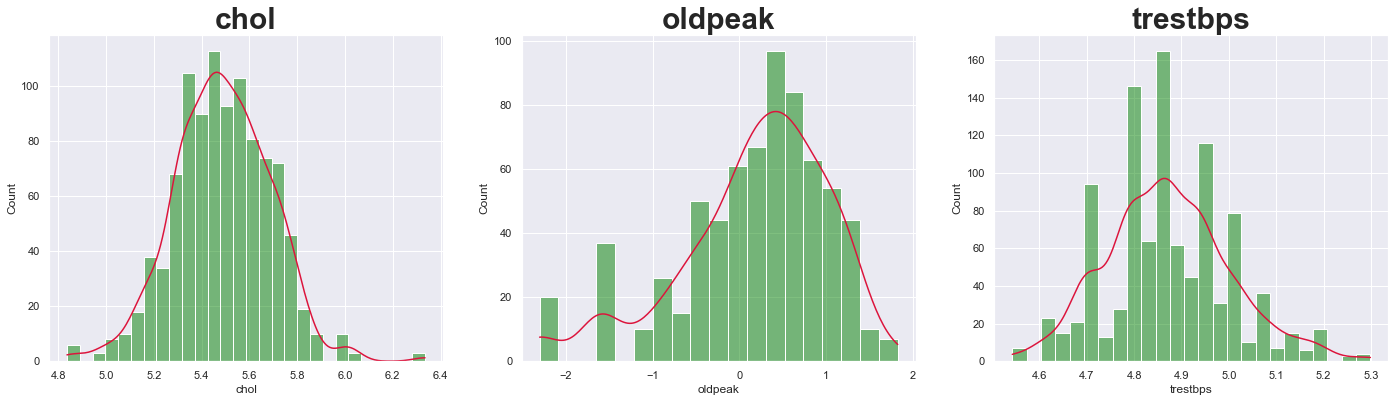

In [65]:
f, axes = plt.subplots(1, 3, figsize=(24,6))
print("Blue: Before log transform")
print("Green: After log transform")

count = 0
for feature in skew_list:
    g = sb.histplot(data=df_new[feature], ax=axes[count], kde=True)
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    g.lines[0].set_color('crimson')
    count+=1

# after normalization
f, axes = plt.subplots(1, 3, figsize=(24,6))

count = 0
for feature in skew_list:
    g = sb.histplot(data=df_trans[feature], ax=axes[count], kde=True, color='green')
    g.set_title(feature, fontdict={'fontsize':30, 'fontweight':'bold'})
    g.lines[0].set_color('crimson')
    count+=1

The log transform has successfully fitted the data distributions for `chol`, `oldpeak` and `trestbps` closer to a normal distribution. 

<h3>Data Standardization + One-Hot Encoding</h3>

We will now perform data standardization and one-hot encoding on the dataset.

<b>Data Standardization</b> using the `StandardScaler` rescales the features to have a mean = 0 and standard deviation = 1. This is to "standardize" the scale among all the features such that each feature is equally important when training the predictive model, as the model may place more weight on features with a larger range.

<b>One-Hot Encoding</b> encodes the categorical variables into a numerical form. For example, the categorical variable `thal` with three classes is transformed under OHE into `thal_1`, `thal_2` and `thal_3`, which are binary variables for each of the classes of `thal`. Many machine learning models cannot work on categorical data directly unless it is transformed into a numerical equivalent, and thus some sort of encoding is important. 

OHE is especially important for variables without an ordinal relationship, as without OHE the model may assume some sort of ordering based on the classes which will lead to erroneous results. For example, the variable `sex` has Male as 1 and Female as 0. Does this mean Male > Female? No, but the model may assume an order. Therefore, OHE is an essential step.

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [66]:
from sklearn.preprocessing import StandardScaler

# initialize scaler
scaler = StandardScaler()

# scale and encode columns
scaled_cols = scaler.fit_transform(df_imputed[cont]) 
ohe_cols = pd.get_dummies(df_imputed[cat], columns = cat)

# convert scaled columns to dataframe
scaled_cols = pd.DataFrame(scaled_cols, index=df_imputed[cont].index, columns=df_imputed[cont].columns)

# concatenate columns back together
df_processed = pd.concat([scaled_cols, ohe_cols, df_imputed['target'].astype('uint8')], axis=1)

df_processed.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target
0,-0.287864,-0.372147,-0.673204,0.827753,-0.075393,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,-0.176799,0.477888,-0.847645,0.264253,1.707976,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.711300,0.761232,-1.409733,-1.036134,1.283364,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.711718,0.931239,-0.847645,0.524330,-0.924616,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0.822783,0.364550,0.916148,-1.859712,0.688908,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [67]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1024
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1007 non-null   float64
 1   trestbps   1007 non-null   float64
 2   chol       1007 non-null   float64
 3   thalach    1007 non-null   float64
 4   oldpeak    1007 non-null   float64
 5   sex_0      1007 non-null   uint8  
 6   sex_1      1007 non-null   uint8  
 7   cp_0       1007 non-null   uint8  
 8   cp_1       1007 non-null   uint8  
 9   cp_2       1007 non-null   uint8  
 10  cp_3       1007 non-null   uint8  
 11  fbs_0      1007 non-null   uint8  
 12  fbs_1      1007 non-null   uint8  
 13  restecg_0  1007 non-null   uint8  
 14  restecg_1  1007 non-null   uint8  
 15  restecg_2  1007 non-null   uint8  
 16  exang_0    1007 non-null   uint8  
 17  exang_1    1007 non-null   uint8  
 18  slope_0    1007 non-null   uint8  
 19  slope_1    1007 non-null   uint8  
 20  slope_2 

<h3>Feature Selection</h3>

The <b>curse of dimensionality</b> says that as we add more features (or dimensions) to our model, the number of rows of training data that we need to build a good model tends to grow exponentially. How do we deal with this?
- <b>Dimensionality Reduction</b>: transforming the dataset from a high-dimensional space to a lower-dimensional space whilst retaining the meaningful properties of the original dataset, such that the remaining predictors are near-equally useful in helping us predict our response variable. 
- <b>Feature Selection</b>: a subset of dimensionality reduction methods that removes the "irrelevant" features such that only the most important features which can meaningfully represent the dataset for our predictive modelling remain.

In this case, we want to determine which predictors may be useful in helping us predict the response variable `target`.

For the Heart Disease UCI dataset, it is important to remember that the dataset retrieved from Kaggle was originally four datasets combined and containing 76 features. The dataset was then reduced to contain ony 14 features including `target`, and all published experiments refer to using only these 14 features. This implies that, in a medical setting, these features may be the most significant in helping diagnose heart disease. In a way, feature selection has already been performed for us.

Nevertheless, the one-hot encoding of the categorical variables has increased the dimensionality of the dataset. We would like to perform <u>feature selection</u> again to find the features that contribute most significantly to the predictive modelling.

<b>Why avoid dimensionality reduction methods like PCA/LDA?</b>

We would like to retain the original meaning of the data. This meaning is lost when we reduce the dataset from higher-dimensionality to lower-dimensionality using methods like PCA/LDA. Fewer features make for a more interpretable model when training the classifier, but it is not as intuitive when trying to interpret the model from a human perspective. Therefore, we will use feature selection methods here instead of dimensionality reduction methods.

https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

We will use the <b>Random Forest</b> classifier to derive feature importances. A Random Forest classifier is an ensemble learning technique that uses multiple decision trees and aggregates their outputs to derive precise predictions. 

Using a Random Forest classifier, we can derive the importance of each feature in contributing to the predictive strength of the classifier model. This is done by ranking features by how well they improve the purity of a node of the tree i.e., by how much the <b>Gini index</b> decreases. The greatest decrease in the Gini index occurs in nodes closer to the root node, while nodes closer to the leaf nodes have the least decrease in impurity. By pruning trees below a particular node, subsets of features which contribute to "purifying" the node can be derived.

In [68]:
from sklearn.ensemble import RandomForestClassifier

# split data into X and y
y = pd.DataFrame(df_processed['target'])
X = pd.DataFrame(df_processed.drop('target', axis = 1))

# initialize RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X, y.values.ravel())

# create list of column names
df_labels = list(df_processed.columns.values)

# get importances of features
imptance = rfc.feature_importances_
imptance_sorted = imptance.argsort()[::-1]

# print each feature from most important to least important
for i in imptance_sorted:
    print("{} - {:.2f}%".format(df_labels[i], (imptance[i] * 100.0)))

ca_0 - 10.19%
oldpeak - 9.01%
cp_0 - 9.01%
thalach - 8.88%
age - 7.64%
thal_2 - 7.28%
chol - 6.71%
thal_3 - 6.50%
trestbps - 6.01%
exang_0 - 3.89%
exang_1 - 3.50%
slope_2 - 2.54%
sex_1 - 2.24%
slope_1 - 2.02%
cp_2 - 1.95%
sex_0 - 1.87%
ca_1 - 1.63%
restecg_0 - 1.31%
restecg_1 - 1.22%
cp_3 - 1.14%
ca_2 - 1.02%
cp_1 - 0.94%
fbs_0 - 0.83%
ca_3 - 0.81%
fbs_1 - 0.78%
slope_0 - 0.52%
thal_1 - 0.48%
restecg_2 - 0.07%


We see that there are low importance features such as `restecg2` and `thal_1`. In fact, some of the observations line up with the findings from the correlation matrices earlier. 

For example, `fbs_1` and `fbs_0` add negligble predictive power to the model, as evident by the feature importance metrics derived from the Random Forest classifier (`fbs_1 - 0.78%` and `fbs_0 - 0.83%`).

However, this does not imply that features with low predictive power do not add value to the model. It may well be the case that the predictive model derives value from these features by combining them with information from other features.

The only case when we can confidently remove a feature is when it contributes no predictive power to the classifier model i.e., importance = 0%. As this is not the case for any of the features, we will not remove any of the features.

<h2>Decision Tree Classifier</h2>

We will first run a simple decision tree classifier with `max_depth = 4` as a preliminary choice.

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

y = pd.DataFrame(df_processed['target'])
X = pd.DataFrame(df_processed.drop('target', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (704, 28) (704, 1)
Test set:  (303, 28) (303, 1)


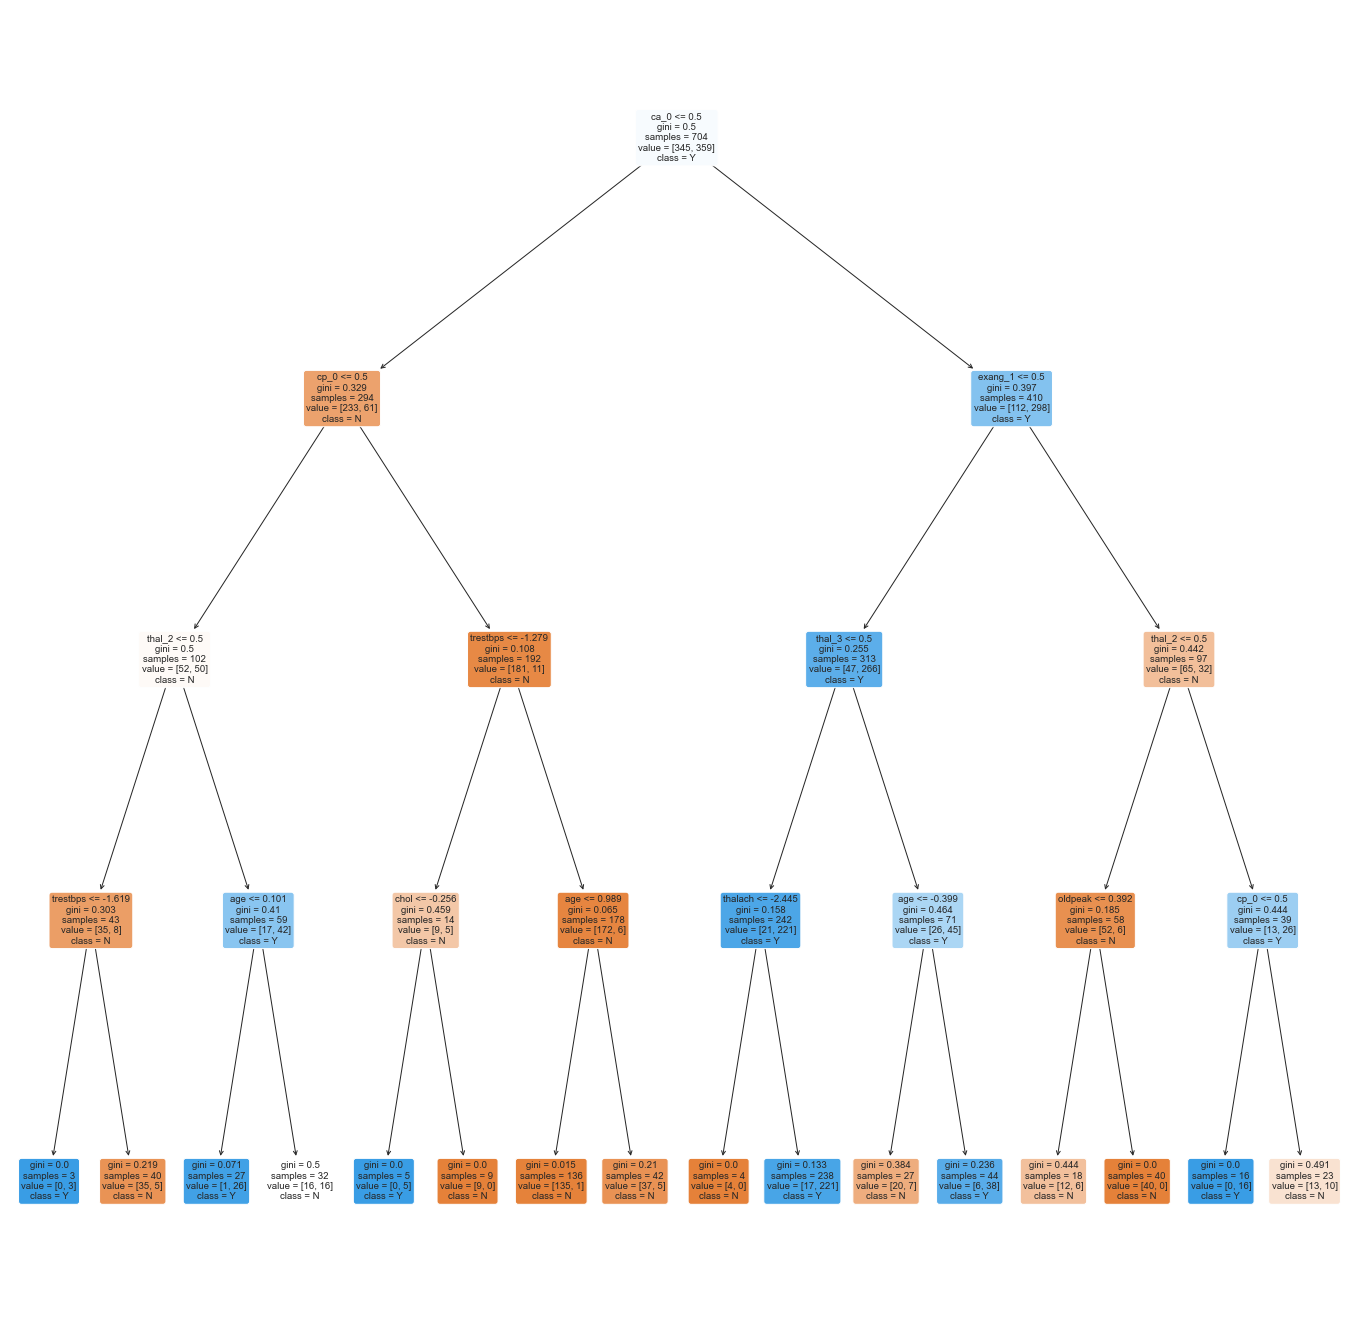

In [110]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
p1 = plot_tree(dectree, filled=True, rounded=True, 
               feature_names=X_train.columns, class_names=["N","Y"])
plt.show()

We will check how good the predictions of both classifier models are on the train set by using <b>Classification Accurracy</b> and <b>Confusion Matrix</b> as the appropriate metrics.

First, we need to check how good the predictions are on the Train set.

In [118]:
from sklearn.metrics import confusion_matrix

# Define a function to evaluate a model based on classification metrics
def classifier_eval(X, y, model):
    # make prediction
    pred = pd.DataFrame(model.predict(X))
    
    # Plot the Confusion Matrix for the classifier model
    f = plt.figure(figsize=(24, 6))
    hm = sb.heatmap(confusion_matrix(y, pred),
               annot=True, fmt='.0f', annot_kws={'size':18})
    hm.set_title('Confusion Matrix', fontdict={'fontsize':20, 'fontweight':'bold'})
    plt.show()
    
    # Retrieve the relevant metrics from the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()

    # Calculate the evaluation metrics for the classifier model
    recall = tp / (tp + fn)
    fpr = fp / (fp + tn)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    print('Recall\t: {:.3f}'.format(recall))
    print('FPR\t: {:.3f}'.format(fpr))
    print('Classification Accuracy\t: {:.3f}'.format(accuracy))

<b>Precision</b> is the ratio of True Positives to the total number of classified positives (True Positives + False Positives), and is therefore a measure of the accuracy of the model in predicting the positive class. In this case, it is a measure of how well the classifier correctly identifies heart disease when it classifies for the positive class. 

<b>Recall</b> is the ratio of True Positives to the total number of actual positives in the dataset (True Positives + False Negatives), and is therefore a measure of the completeness of the model in predicting the positive class. In this case, it measures how well the classifier identifies heart disease out of all the patients who actually have heart disease.

We prefer the Recall metric since correctly identifying every patient with heart disease as having heart disease is more important to us i.e., Recall should be as close to 1.000 as possible. In a medical context, this metric is especially crucial as the misidentification of a positive case as a negative case (i.e., classifying a patient with an underlying cardiovascular condition to be completely healthy and free of disease) can not only be considered medical malpractice, but also spells major implications for the continued health of a patient and can lead to them unknowingly aggravating their condition further without any early intervention. We need to be able to identify every single case with heart disease.
https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/#False_Positive_Rate_&_True_Negative_Rate

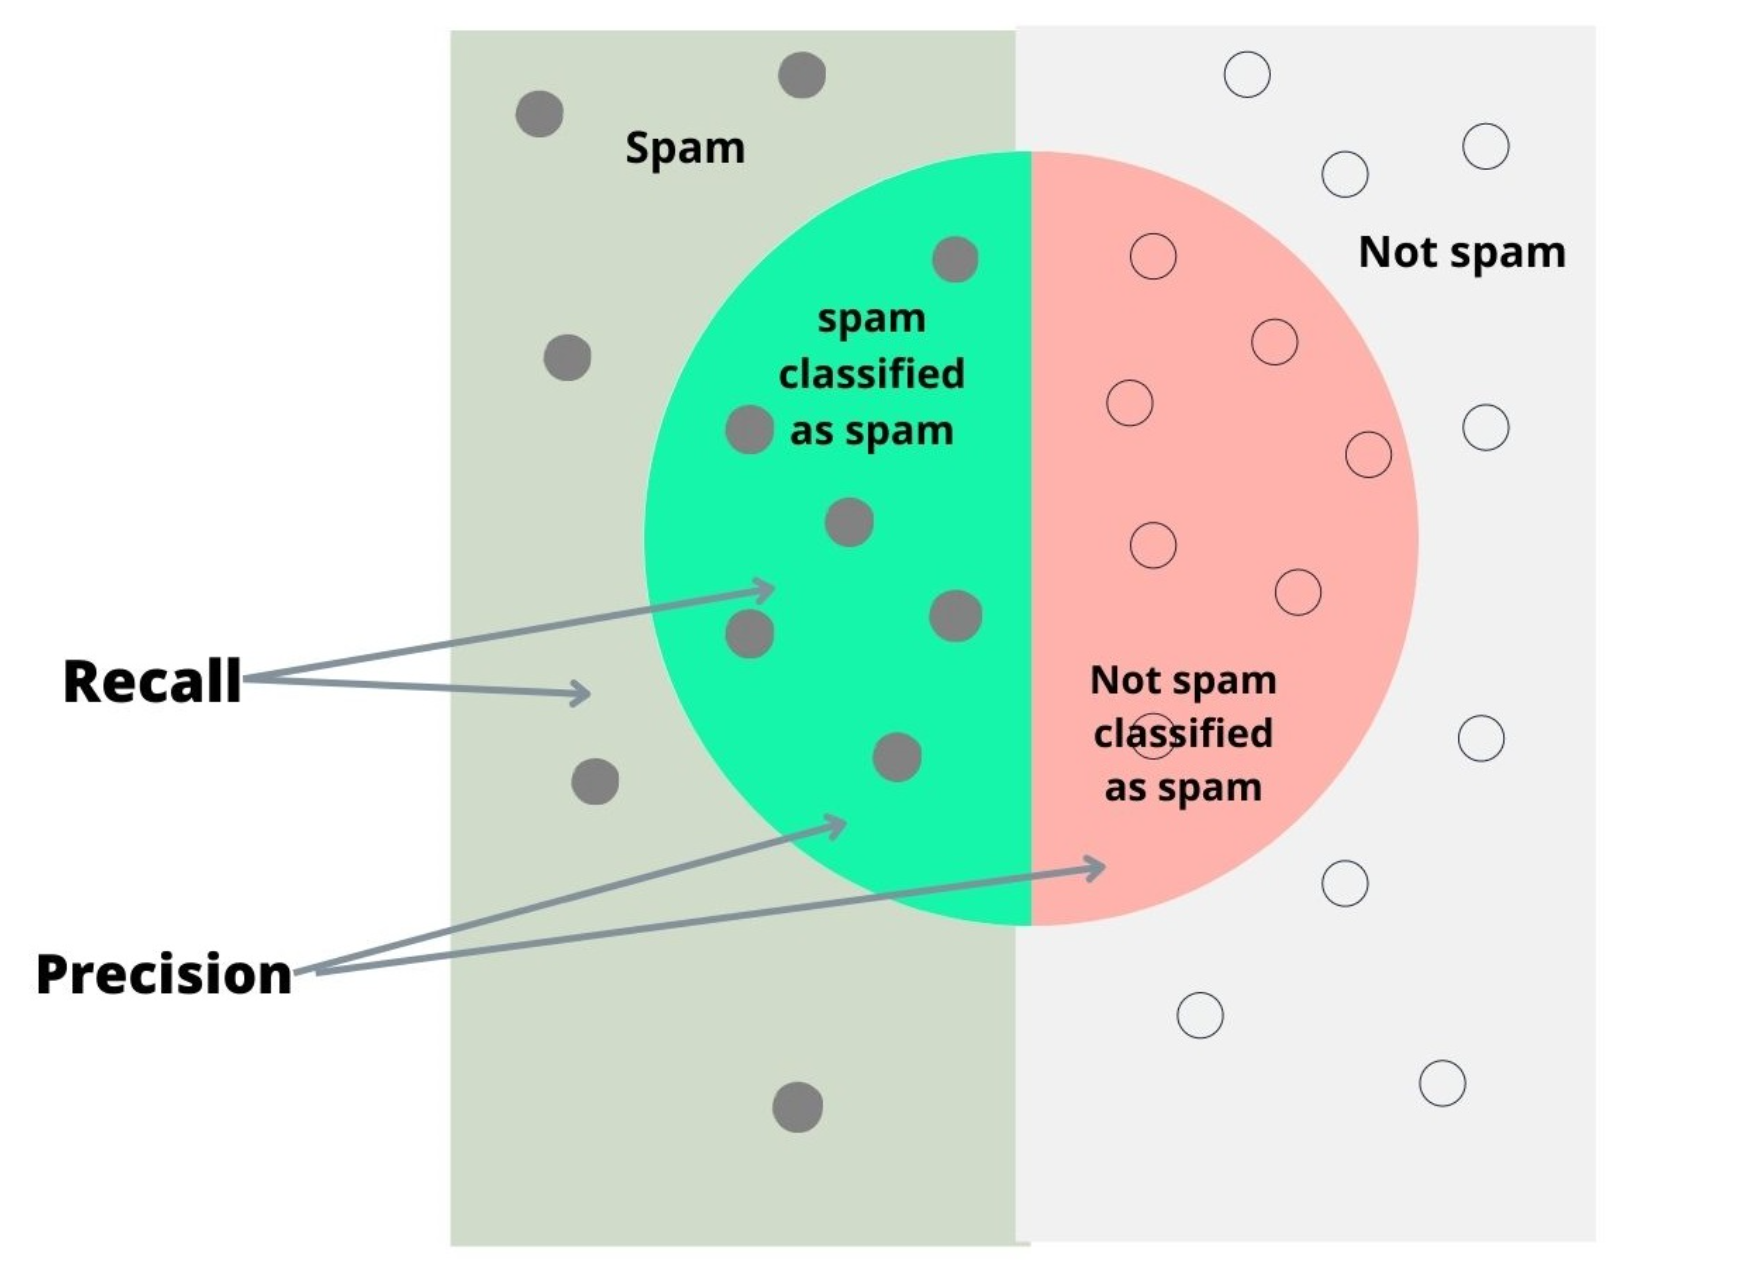

The <b>False Positive Rate</b>, which is the ratio of False Positives to the total number of actual negatives in the dataset (True Negatives + False Positives) is also crucial in the medical context, as we do not want to "scare" patients into thinking they have heart disease when they actually do not, which can count as medical malpractice. Ideally, we want this metric to be as close to 0.000 as possible.

Next, the <b>Accuracy</b> metric, which is the ratio of correct predictions to the total predictions made, is also an important metric which shows how well the model is performing its classification task on a general scale.

Train Set


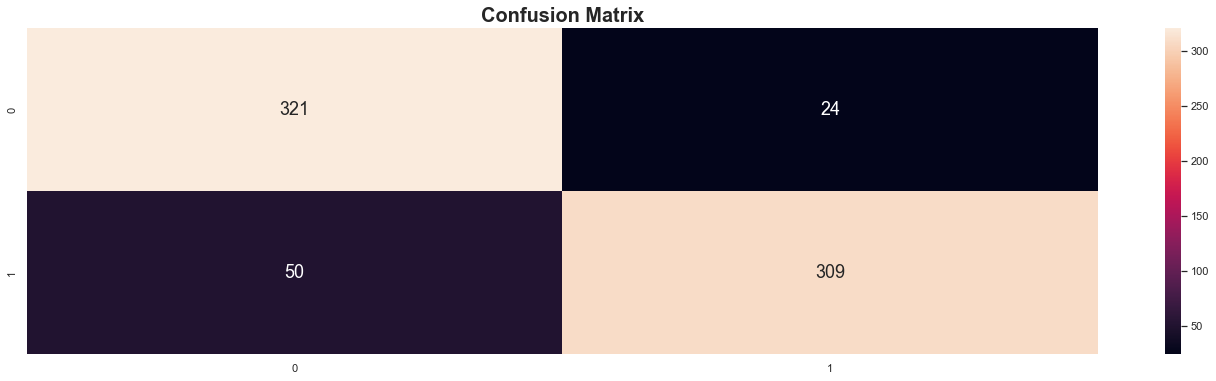

Recall	: 0.861
FPR	: 0.070
Classification Accuracy	: 0.895


In [121]:
# Evaluate the Decision Tree classifier on the Train set
print("Train Set")
classifier_eval(X_train, y_train, dectree)

Here are the insights from the evaluation metrics:
* From a medical perspective, the `Recall` rate of the Decision Tree classifier on the Train set is dangerously low, as it implies that for around 14 in every 100 patients with actual heart disease are misclassified, which is ethically unsound given the concerns explained before. 
* The `False Positive Rate`, however, is pretty good, as approximately only 1 in every 100 patients without heart disease is misclassified as having heart disease. 
* The `Classification Accuracy` of the model isn't the best either, as it fails to classify approximately every 10 in 100 patients to their correct classes.

Just from the Train set alone, the Decision Tree classifier already isn't doing very well.

<br>
Now we will check how good the predictions of this decision tree classifier are on the Test set.

Test Set


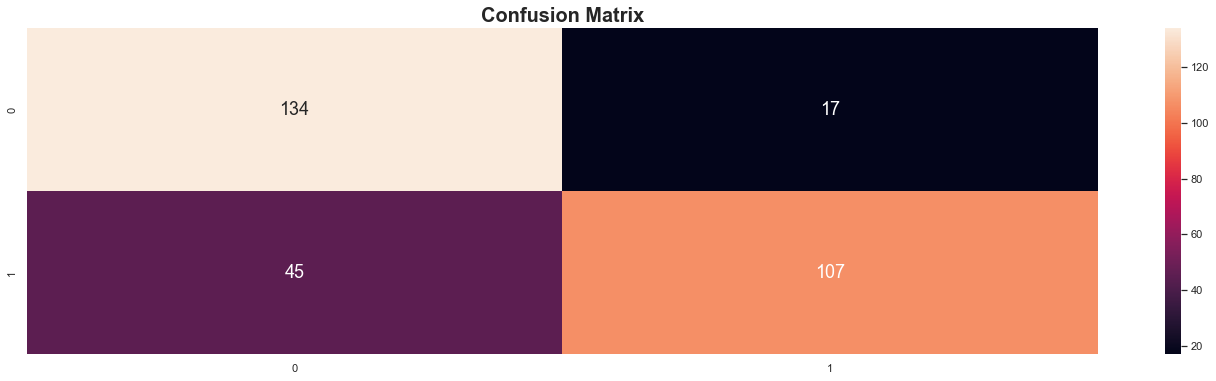

Recall	: 0.704
FPR	: 0.113
Classification Accuracy	: 0.795


In [123]:
print("Test Set")
classifier_eval(X_test, y_test, dectree)

As expected, the Decision Tree classifier performs significantly worse on all fronts when evaluated against unknown samples. We need to select a new model for better predictions.

<h2>Model Selection w/ K-Fold Cross Validation</h2>

How do we make the classifier model more accurate? Perhaps we can try out another model, but how do we go about doing that?

We can compare the predictive power of different classifier models with the <b>K-Fold cross validation</b> approach, which is a statistical method used to evaluate the performance of a model 
1. This method takes a dataset and splits it into subsets distinct from each other (known as "folds").
2. For each fold, the model is trained on the remaining dataset excluding the fold, taken to be the train set.
3. The model is then evaluated on the fold, taken to be the test set of unknown samples.
4. The perfomance of the model is determined from the evaluation scores across all folds.

https://machinelearningmastery.com/k-fold-cross-validation/

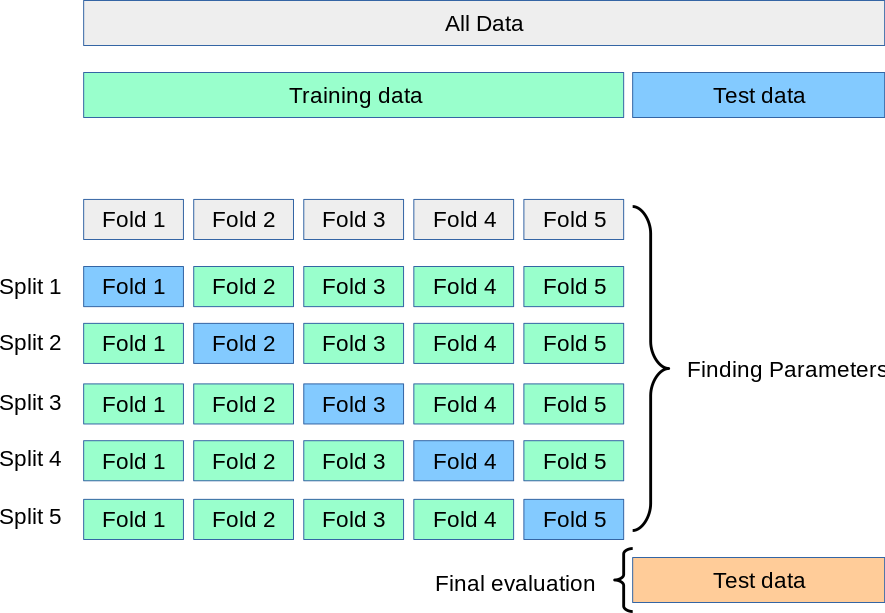

As this is a binary classification problem, we have chosen various classifiers most well-attuned for binary classification to be evaluated with the K-Fold cross validation approach. https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2

In [124]:
# Import essential models and functions from sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import auc, confusion_matrix, classification_report, accuracy_score, mean_absolute_error

# classifier models that can be applied to binary classification
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [125]:
# list of models' names
names = [
    "Logistic Regression",
    "SGD",
    "Ridge",
    "K-Nearest Neighbors",
    "Linear SVC",
    "RBF SVC",
    "Random Forest",
    "Ada Boost",
    "Gradient Boosting",
    "Bagging",
    "Naive Bayes",
    "XG Boost",
    "Decision Tree"
]

# list of classifier models
models = [
    LogisticRegression(),
    SGDClassifier(),
    RidgeClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    GaussianNB(),
    XGBClassifier(),
    DecisionTreeClassifier()
]

name = 0
scoring = 'f1' # use F1 scoring as it is more suitable for classification problems
cm_dict = {}

for model in models:
    kfold = KFold(n_splits = 10) # value with low bias and modest variance
    result = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    cm_dict[names[name]] = [result.mean(), result.std()]
    #print('%s:\t %f (%f)' % (names[name], result.mean(), result.std()))
    name+=1

print("Mean Accuracy of Models")
for k,v in sorted(cm_dict.items(), key=lambda p:p[1][0], reverse=True):
    print('%f: %s' % (v[0], k))

Mean Accuracy of Models
0.970913: Random Forest
0.963302: XG Boost
0.959311: Bagging
0.957076: Decision Tree
0.953686: Gradient Boosting
0.927590: RBF SVC
0.901465: Ada Boost
0.876725: Logistic Regression
0.872117: Ridge
0.868320: Linear SVC
0.844533: Naive Bayes
0.842023: K-Nearest Neighbors
0.830980: SGD


The models that perform extremely well based on the mean accuracy over 10 folds include the <b>ensemble classifier models</b> such as the `Random Forest`, `XG Boost` and `Gradient Boosting` models. This aligns with the theory of ensemble learning, in which predictions from multiple models are merged to mitigate the errors/biases in individual models and give rise to more precise predictions.
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

We will select the Top 3 models with highest mean accuracy according to the 10-fold cross validation:
1. `Random Forest`
2. `Bagging`       
3. `XG Boost`

<b>NOTE</b>: Bagging, XG Boost and Decision Tree tend to compete with each other in score and hence swap places in the F1 score ranking frequently (between ranks 2 to 4). However, Bagging and XG Boost were chosen over the normal Decision Tree classifier as these are ensemble learning techniques which typically perform better than a single Decision Tree.

<h2>Hyperparameter Tuning with GridSearch</h2>

Now that we have chosen our models, we would like to find the best hyperparameters that will return us the best results for our predictive models. <b>GridSearchCV</b> tries out all combinations of hyperparameters for the predictive model, and determines the best set of hyperparameters.

<h3>Random Forest</h3>

Random Forest classifier is an ensemble learning technique that uses multiple decision trees, each of which handles a subset of the dataset and generates its own output. The outputs from each individual tree is then aggregated together and the final output is decided either based on majority voting, or averaging. One such example is shown below. 

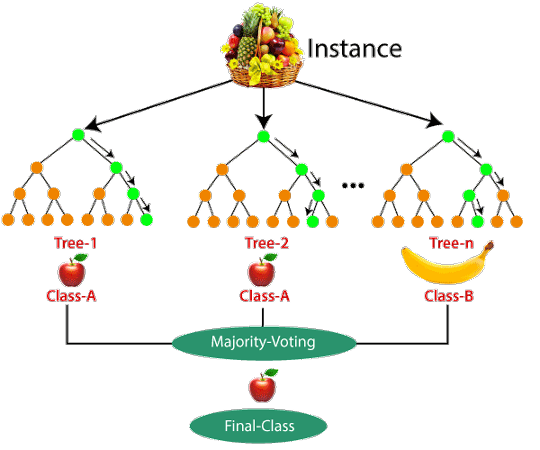

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

For the Random Forest classifier, the most important hyperparameters are:
- `n_estimators`, which decides the number of trees in the forest, 
- `max_features`, which denotes the number of independent variables considered at each split of the tree,
- `max_depth`, which decides the depth of each individual tree,
- `max_samples`, which denotes the number of samples considered at each split of the tree.

These are parameters which pertain to how each tree of the tree-based ensemble learning model is constructed.

In [126]:
rfc = RandomForestClassifier()

grid_params = {
    'max_depth': range(4, 20, 2),    # keep <10 so that trees don't overfit
    'n_estimators': range(100, 501, 100),
    'max_features': range(4, 28, 4),
    'max_samples': [x / 20 for x in range(1, 11)]
}

gs_rfc = GridSearchCV(rfc, grid_params, cv=5, n_jobs=-1, scoring='f1')
gs_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(4, 20, 2),
                         'max_features': range(4, 28, 4),
                         'max_samples': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                         0.4, 0.45, 0.5],
                         'n_estimators': range(100, 501, 100)},
             scoring='f1')

In [127]:
print(gs_rfc.best_params_)

{'max_depth': 12, 'max_features': 4, 'max_samples': 0.5, 'n_estimators': 500}


In [128]:
# Print the score (F1-Score) of the best Model after CV
print("F1-Score before GridSearchCV:")
print(round(cm_dict['Random Forest'][0], 7))
print("F1-Score after GridSearchCV:")
print(round(np.abs(gs_rfc.best_score_), 7))
print("% increase in F1-Score:")
print('{:.3%}'.format(round((np.abs(gs_rfc.best_score_) - cm_dict['Random Forest'][0]) / cm_dict['Random Forest'][0], 7)))

F1-Score before GridSearchCV:
0.9709128
F1-Score after GridSearchCV:
0.9702426
% increase in F1-Score:
-0.069%


<h3>Bagging</h3>

Bagging (<b>b</b>ootstrap + <b>ag</b>gregation) is another ensemble learning technique that aggregates the outputs of multiple decision trees to make precise predictions, and is very similar to the Random Forest classifier. The main difference is that in Random Forest, each individual decision tree considers only a random subset of features when branching, while the decision trees in a Bagging classifier considers <b>all</b> features when branching. 

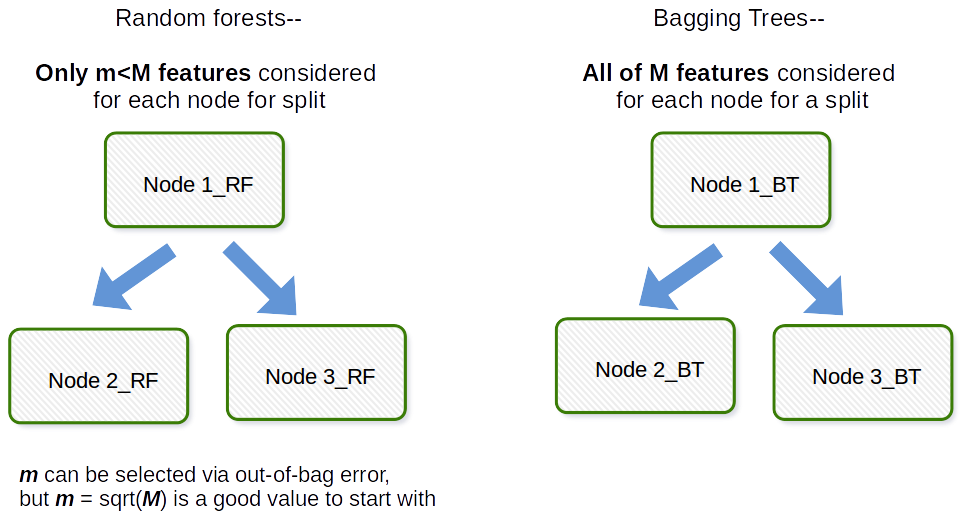

https://stats.stackexchange.com/questions/264129/what-is-the-difference-between-bagging-and-random-forest-if-only-one-explanatory

In a sense, the Random Forest classifier is an extension of the Bagging classifier that decorrelates the outputs from each decision tree i.e., the resulting predictions from the subtrees have less correlation as decisions in the subtrees are made on a <b>random</b> subset of features. This allows the Random Forest classifier to make better predictions than the Bagging classifier most of the time (which is the case with our K-fold cross validation).

Nevertheless, we will still attempt to fine tune the Bagging classifier model, where the most important hyperparameters are:
- `n_estimators`, which decides the number of trees in the forest, 
- `max_features`, which denotes the number of independent variables considered at each split of the tree,
- `max_samples`, which denotes the number of samples considered at each split of the tree.

As expected, this is very similar to the Random Forest classifier.

In [129]:
bg = BaggingClassifier()

grid_params = {
    'n_estimators': range(100, 501, 100),
    'max_features': range(4, 28, 4),
    'max_samples': [x / 20 for x in range(1, 11)]
}

gs_bg = GridSearchCV(bg, grid_params, cv=5, n_jobs=-1, scoring='f1')
gs_bg.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': range(4, 28, 4),
                         'max_samples': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                         0.4, 0.45, 0.5],
                         'n_estimators': range(100, 501, 100)},
             scoring='f1')

In [130]:
print(gs_bg.best_params_)

{'max_features': 16, 'max_samples': 0.5, 'n_estimators': 300}


In [131]:
# Print the score (F1-Score) of the best Model after CV
print("F1-Score before GridSearchCV:")
print(round(cm_dict['Bagging'][0], 7))
print("F1-Score after GridSearchCV:")
print(round(np.abs(gs_bg.best_score_), 7))
print("% increase in F1-Score:")
print('{:.3%}'.format(round((np.abs(gs_bg.best_score_) - cm_dict['Bagging'][0]) / cm_dict['Bagging'][0], 7)))

F1-Score before GridSearchCV:
0.9593105
F1-Score after GridSearchCV:
0.9688042
% increase in F1-Score:
0.990%


<b>XG Boost</b>

Just like the previous classifiers, XG Boost is an ensemble learning technique that aggregates the outputs of multiple decision trees to make better and more precise predictions with corrected bias/error. However, XG Boost goes one step further and employs a <b>gradient-boosting</b> framework that leverages on an ensemble of weaker models by modelling the next tree based on its predecessor's biases/errors. 

By leveraging on gradient-boosting and ensemble learning, the XG Boost classifier optimizes both execution speed and model performance and is therefore one of the most powerful classifier models.

First, let's explore the hyperparameters of XG Boost.

In [132]:
xgb = XGBClassifier()
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

As XG Boost is a tree-based classifier model, it is only natural that tree-related parameters like `max_depth` and `colsample_bytree` be chosen for tuning. In addition, documentation suggests that we also look into optimizing the regularization parameters like `gamma`, which determine how "conservative" the model is in making predictions by controlling the model's weights = avoids overfitting!

In [133]:
# XG Boost Classifier
grid_params = {
    'max_depth': range(4, 11, 2),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'learning_rate': [0.05, 0.12, 0.18, 0.24, 0.3],
    'n_estimators': range(100, 1001, 150),
    'gamma': [0, 1, 5, 10]
}

gs_xg = GridSearchCV(xgb, grid_params, cv=5, n_jobs=-1, scoring='f1')
gs_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [134]:
print(gs_xg.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.12, 'max_depth': 8, 'n_estimators': 250, 'subsample': 0.6}


In [135]:
# Print the score (F1) of the best Model after CV
print("F1-Score before GridSearchCV:")
print(round(cm_dict['XG Boost'][0], 7))
print("F1-Score after GridSearchCV:")
print(round(np.abs(gs_xg.best_score_), 7))
print("% increase in F1-Score:")
print('{:.3%}'.format(round((np.abs(gs_xg.best_score_) - cm_dict['XG Boost'][0]) / cm_dict['XG Boost'][0], 7)))

F1-Score before GridSearchCV:
0.9633016
F1-Score after GridSearchCV:
0.9749278
% increase in F1-Score:
1.207%


Here are the results of GridSearch on the predictive power of the three models:

In [136]:
gsr_df = pd.DataFrame({'model': ['Random Forest', 'Bagging', 'XG Boost'],
                       'beforeGS': [cm_dict['Random Forest'][0], cm_dict['Bagging'][0], cm_dict['XG Boost'][0]],
                       'afterGS': [round(np.abs(gs_rfc.best_score_), 7), round(np.abs(gs_bg.best_score_), 7), round(np.abs(gs_xg.best_score_), 7)]})
gsr_df.set_index('model')

,beforeGS,afterGS
model,,
Random Forest,0.970913,0.970243
Bagging,0.959311,0.968804
XG Boost,0.963302,0.974928


After tuning the hyperparameters for the classifier models, we see that the tuned `XG Boost` classifier has the highest score. Therefore, the XG Boost classifier will be chosen as the predictive model for classifying patients with or without heart disease.

<h3>Model Prediction w/ XG Boost</h3>

Now, we will evaluate the XG Boost model on both the Train and Test sets.

Train Set


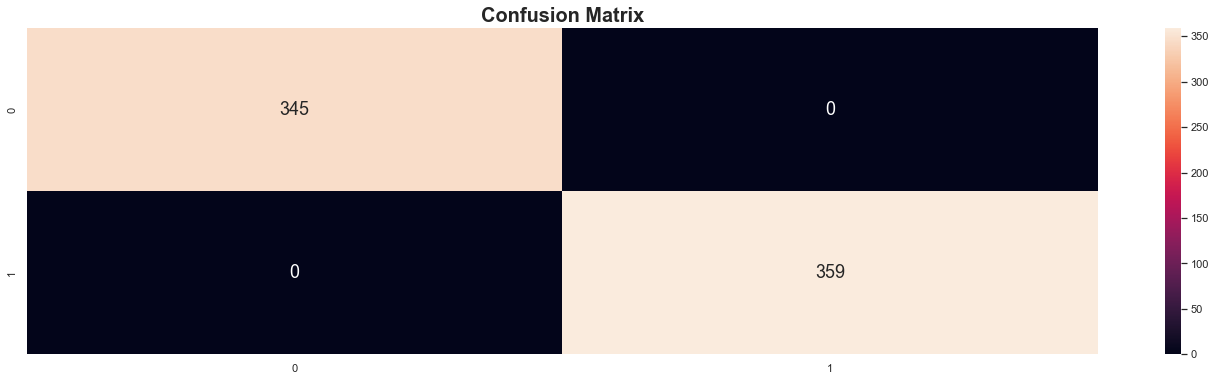

Recall	: 1.000
FPR	: 0.000
Classification Accuracy	: 1.000


In [137]:
print("Train Set")
classifier_eval(X_train, y_train, gs_xg)

On the train set, the XG Boost classifier has perfect scores for all three evaluation metrics. Is this problematic?

<b>Overfitting</b> is when the model fits to the training data too well and thereby is unable to work out the pattern between the features in predicting the response variable, impeding its predictive quality and ability to make accurate predictions on unseen data.

We can ask ourselves then, is our classifier overfitting to the train data? To determine this, we need to evaluate the XG Boost classifier model against the Test set as well, which consists of unknown samples the classifier has not been trained on.

Test Set


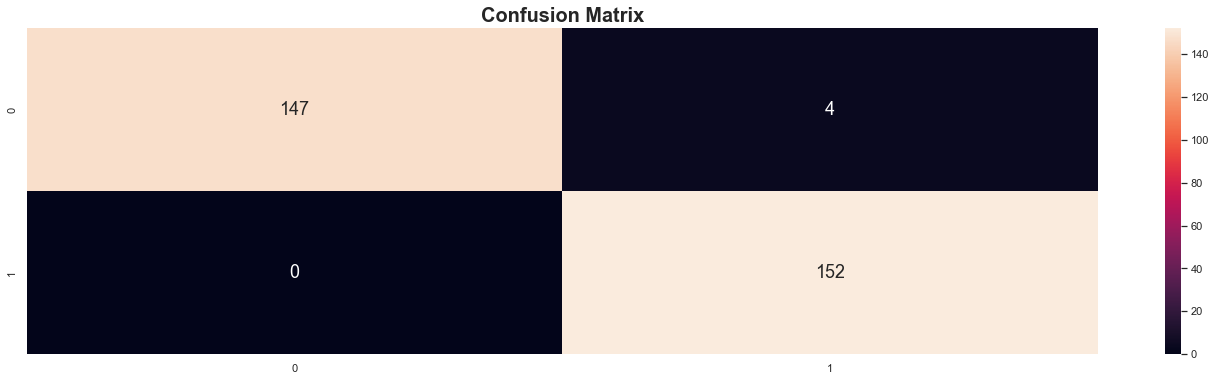

Recall	: 1.000
FPR	: 0.026
Classification Accuracy	: 0.987


In [138]:
print("Test Set")
classifier_eval(X_test, y_test, gs_xg)

Surprisingly, the XG Boost classifier model manages to achieve perfect `Recall` even on the Test set, which is an excellent indicator of its ability to make accurate predictions for the positive class, even on unknown samples. In a medical context, this means that the model is able to correctly classify all patients who actually have heart disease, which is exactly what we want. Additionally, the `False Positive Rate` and `Classification Accuracy` are still exceptionally good for performing on unknown samples.

<b>ROC AUC Curve</b>

The <b>Receiver Operator Characteristic (ROC)</b> curve plots the `Recall` against the `FPR` to measure the probability of correct predictions (the performance of the model) for the binary classes at different thresholds. It is usually accompanied by the <b>Area Under the Curve (AUC)</b>, which measures the ability of a binary classifier to distinguish between classes.

Together, the ROC AUC plot is typically used to evaluate the separability of binary classification models, that is, the model's ability to tell the different classes apart. This is based on the model's ability to make more correct predictions (True Positives and True Negatives) than wrong predictions (False Positives and False Negatives).
* The higher the AUC, the better the model in distinguishing between the classes.
    * AUC = 1: The model can 100% confidently tell between the positive and negative classes.
    * 0.5 < AUC < 1: The probability of the model distinguishing between the classes is high.
    * AUC = 0.5: The model can NOT tell the difference between positive and negative classes, and randomly assigns samples to whichever class.
    * AUC = 0: The model has an inverse understanding of the data, and 100% classifies all true positives as false negatives, and all true negatives as false positives.

Ideally, we want AUC to be as close to 1 as possible. We will use the ROC AUC plot to check on the predictive effectiveness of the XG Boost model.

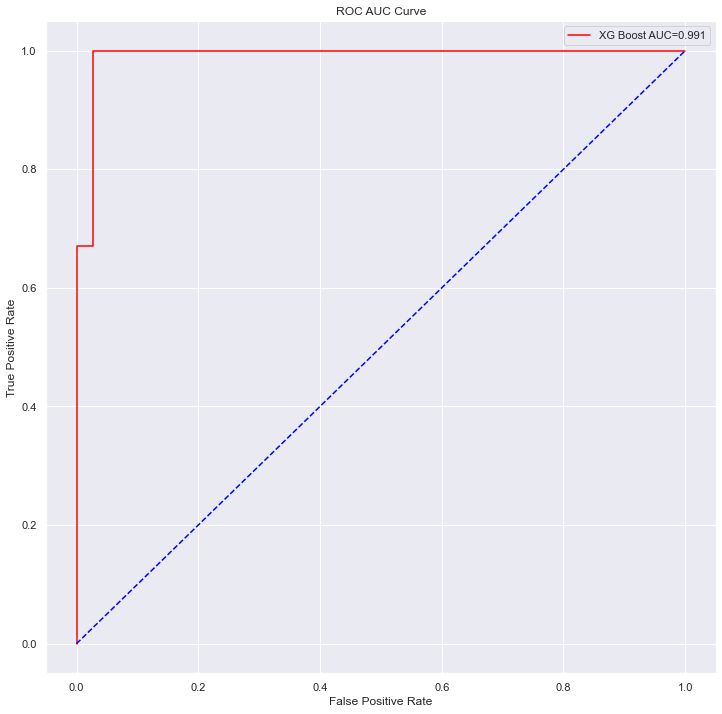

In [307]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for XG Boost
xg_pred_prob = gs_xg.predict_proba(X_test)

# ROC curve
fprxg, tprxg, _ = roc_curve(y_test, xg_pred_prob[:,1])

# AUC score
aucxg = roc_auc_score(y_test, xg_pred_prob[:,1])

# Constructing the ROC AUC plot
f = plt.figure(figsize=(12,12))
plt.plot(fprxg, tprxg, color='red', label=f'XG Boost AUC={aucxg:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue') # ROC curve for TPR = FPR
plt.title("ROC AUC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Just from the shape of the XG Boost ROC curve alone, one can observe that at most thresholds the classifier is able to distinguish between those with heart disease and those without heart disease exceptionally well. The AUC score of the XG Boost classifier is `0.991`, which is extremely close to the optimal AUC score = 1, and therefore it can be interpreted that the model is near 100% confident in distinguishing between the two classes.

<h2>Data-Driven Insights & Recommendations</h2>

<b>Which feature contributes more to predicting heart disease?</b>

To fight against the prevalence of heart disease, there is a need to find out what exactly factors the most into the development of heart disease in patients. For the XG Boost model, we will extract the feature importances to determine the relevance of features in the model's classification task and grant ourselves an insight into the features that contribute most to predicting heart disease.

Text(0.5, 1.0, 'Feature Importance in Predicting Heart Disease')

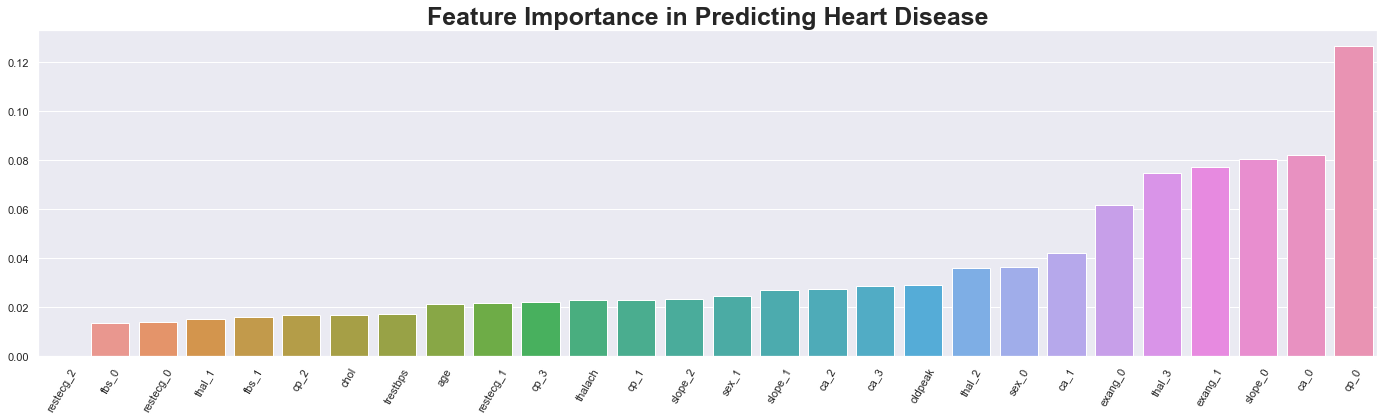

In [290]:
# get importances of features
imptance = gs_xg.best_estimator_.feature_importances_

keys = list(X.columns.values)
FI_dict = dict(zip(keys, imptance))
FI_dict = dict(sorted(FI_dict.items(), key=lambda item: item[1]))
    
# plot feature importances
f = plt.figure(figsize=(24,6))
g = sb.barplot(x=list(FI_dict.keys()), y=list(FI_dict.values()))
g.set_xticklabels(g.get_xticklabels(), rotation=60)
g.set_title('Feature Importance in Predicting Heart Disease', fontdict={'fontsize':25, 'fontweight':'bold'})

From the graph, the following insights can be made:
* `cp_0`: This feature has the highest importance for the model in classifying heart disease. From the bivariate analysis during the EDA stage and the insights from the feature importance plot, it can be said that the classifier can more confidently make predictions based on the insight from `cp_0` that the absence of chest pain strongly implies that a patient has no heart disease.

<img src="./images/cp_0.png" 
     align="center" 
     width="500" />
     
* `ca_0`, `thal_3`, `exang_0` and `exang_1`: These features appear to be equally important for the model, coming only after `cp_0`. Similarly, the insights gained from EDA + the feature importance plot suggests the following:
    * if there are zero major vessels colored by fluoroscopy (`ca_0`) and no exercise-induced anginal pain in individuals (`exang_0`), then the classifier can more confidently classify a patient as having heart disease, as compared to most other features in the dataset
    
<table>
    <tr>
      <td>
      <img src='./images/ca_0.png'width=450>
      </td>
      <td>
      <img src='./images/exang_0.png'width=450>
      </td>
    </tr>
</table>

* 
    * if there is exercise-induced anginal pain in individuals (`exang_1`) or if a patient suffers from thalassemia with a reversible defect i.e., there is normal blood flow despite thalassemia (`thal_3`), then the classifier can more confidently classify a patient as not having heart disease, as compared to most other features in the dataset.
    
<table>
    <tr>
      <td>
      <img src='./images/exang_1.png'width=450>
      </td>
      <td>
      <img src='./images/thal_3.png'width=450>
      </td>
    </tr>
</table>

* `slope_0`: This feature, which implies a downsloping peak ST segment recorded during exercise, is an oddity when compared to the insights gathered from EDA. The feature importance plot suggests that this feature helps the classifier make more confident predictions as compared to most other features in the dataset. However, the bivariate analysis EDA suggests otherwise, as it shows that the classes for the response variable are mostly balanced, implying that `slope = 0` would not be helpful in making distinctions between classes. 
    * While `slope_0` may not be a useful feature on its own, it is possible that the classifier might have derived a meaningful relationship between `slope_0` and some of the other features that helped it to make predictions on the data, which could explain its high feature importance.
    
<img src="./images/slope_0.png" 
     align="center" 
     width="500" />
     
* `restecg_2`: On the contrary, this is the least important feature for the XG Boost classifier in helping it predict heart disease in patients. From the bivariate count plot, this can be attributed to the low frequency of samples for this particular class, which thereby results in the model not being able to make any meaningful relationships between `restecg_2` and the response variable.

<img src="./images/restecg_2.png" 
     align="center" 
     width="500" />

Overall, the observations can be condensed into the following data-driven insights:
* Patients are <u>much more</u> susceptible to heart disease if:
    * more of the heart vessels, which supply blood flow to the heart, are blocked (due to cholesterol build-up in the walls of the vessels),
    * they experience chest pain not only during exercise, but even in a resting state.
* Patients are <u>much less</u> susceptible to heart disease if:
    * there is no prolonged or frequent chest pain in daily life.
    * if chest pain is ONLY experienced during physical activity, then it is less likely to be an indicator of heart-related problems and can be construed to mean more pressure is being put on the heart during exercise, which is normal.
    * for patients with thalessemia, if it is of the reversible defect type, then they are at lower risk of heart disease as there is normal blood flow.

<h2>Recommendations</h2>